# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


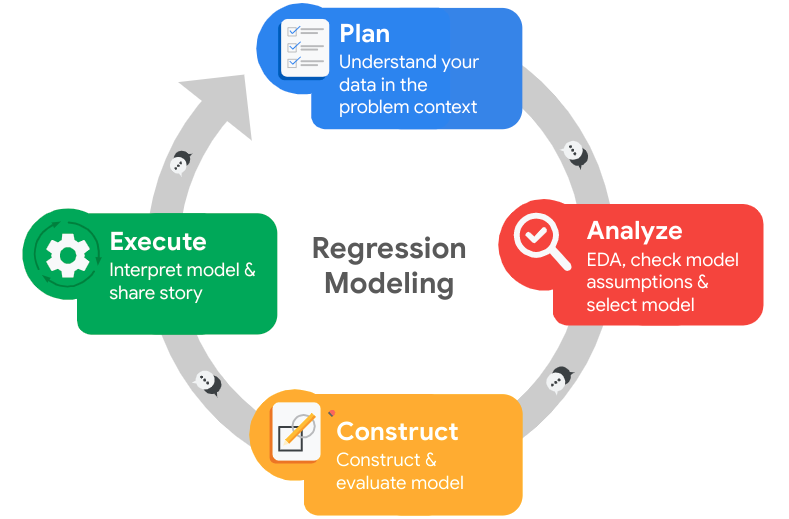

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* Who are your stakeholders for this project?
  * The senior leadership team of Salifort Motors.

* What are you trying to solve or accomplish?
  * Analyze the results of a recent employee survey to come up with ideas for how to increase employee retention.
  * To help with this, design a model that predicts whether an employee will leave the company based on their department, number of projects, average monthly hours, and any other data points that may be helpful.

* What are your initial observations when you explore the data?
  * The dataset has 14,999 rows and 10 columns (2 are type float64, 6 are type int64, and 2 are type object)
  * The Department column has 10 unique values.
  * The salary column has 3 unique values.
  * A few column names are either misspelled (average_montly_hours) or need to be standardized in snake_case (Work_accident and Department).
  * There are no missing values
  * There are 3,008 duplicate rows in the dataset.
  * The tenure column (formerly time_spend_company) contains values that could be considered as outliers.

* What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
  * The results of a survey conducted by Human Resources on a sample of employees for their “satisfaction_level”, “last_evaluation” score, and so on.
  * Jupyter Notebook on Google Colaboratory

* Do you have any ethical considerations in this stage?

  Below is a list of considerations in regard to ethics, which we need to check at various stages of the PACE process.
  * Aggregate data and remove personally identifiable information to protect people and give them more control over their own data.
  * Will removing outliers to improve results, predictions, or forecasts change the data story?
  * Correlation is not causation.
  * Logistic regression, its logit being modeled in the form of multiple linear regression, can yield highly interpretable and communicable results. But because the underlying math could a bit more complex, be mindful of how results are conveyed and what the coefficients mean.
  * Prioritize fairness in the data that we have and will be used. Part of this responsible data stewardship is taking steps to reduce the potential of unintended consequences of machine learning applications.
  * Recognizing the potential for bias will help to minimize risk. Bias in machine learning is particularly deceptive because it stems from human bias. But because a computer makes the prediction, it's easy for the result to seem objective. Often, the bias is unintentional.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###
# Standard operational package imports.
import pandas as pd
import numpy as np
from scipy import stats
# Important imports for preprocessing, modeling, and evaluation.
#import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,\
recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/GADAC/Course 7 Capstone/'

Mounted at /content/drive


In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv(path+"HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [6]:
# EXTRA, value counts for number_project
df0['number_project'].value_counts()

,count
number_project,
4,4365
3,4055
5,2761
2,2388
6,1174
7,256


In [7]:
# EXTRA, value counts for Department
df0['Department'].value_counts()

,count
Department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [8]:
# EXTRA, value counts for salary
df0['salary'].value_counts()

,count
salary,
low,7316
medium,6446
high,1237


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
# prompt: In dataframe df0, rename `average_montly_hours` to `average_monthly_hours`, `Work_accident` to `work_accident`, and `Department` to `department`.

df0 = df0.rename(columns={'average_montly_hours':'average_monthly_hours', 'time_spend_company':'tenure', 'Work_accident':'work_accident', 'Department':'department'})


In [11]:
# Rename columns as needed
### YOUR CODE HERE ###

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# prompt: Create a dataframe df_temp, containing two columns and three rows, all of the rows are duplicates.

# Create a sample dataframe with duplicate rows
df_temp = pd.DataFrame({'col1': [1, 1, 1], 'col2': [2, 2, 2]})

# Display the dataframe
print(df_temp)


   col1  col2
0     1     2
1     1     2
2     1     2


In [14]:
# EXTRA
df_temp.duplicated().sum()

2

In [15]:
# EXTRA
df_temp.drop_duplicates()

,col1,col2
0,1,2


In [16]:
# prompt: Check for duplicate rows in df0.

df0.duplicated().sum()


3008

In [17]:
# Check for duplicates
### YOUR CODE HERE ###


In [18]:
# prompt: In the dataframe df0, show duplicate rows and display them so that matching rows are next to each other.

# Find duplicate rows
duplicate_rows = df0[df0.duplicated(keep=False)]

# Display duplicate rows with matching rows next to each other
display(duplicate_rows.sort_values(by=df0.columns.tolist()))


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [19]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###


In [20]:
# prompt: Drop the duplicate rows in df0 and save the resulting dataframe into df1.

# Drop duplicate rows
df1 = df0.drop_duplicates()


In [21]:
# EXTRA
df1.shape

(11991, 10)

In [22]:
# EXTRA
df1.shape[0] + df0.duplicated().sum() == df0.shape[0]

True

In [23]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###


In [24]:
# EXTRA
df1.duplicated().sum()

0

In [25]:
# EXTRA
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

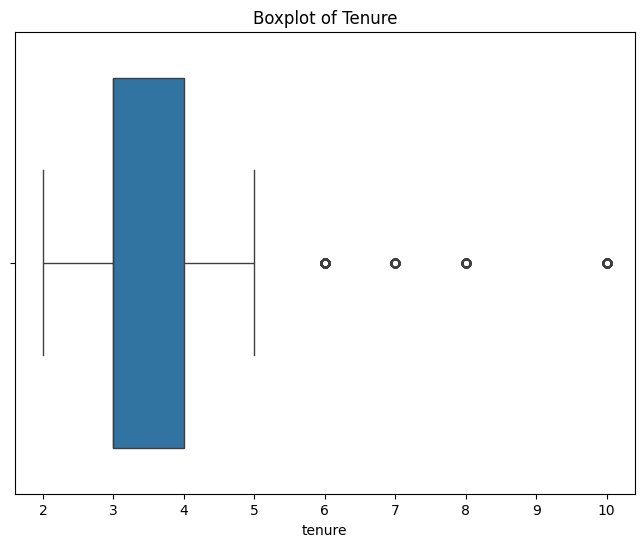

In [26]:
# prompt: Create a boxplot for the `tenure` column of df1.

plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['tenure'])
plt.title('Boxplot of Tenure')
plt.show()


In [27]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###



In [28]:
# prompt: In dataframe df1, count the number of rows containing outliers for `tenure`.

# Calculate the IQR (Interquartile Range)
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = df1[(df1['tenure'] < lower_bound) | (df1['tenure'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in 'tenure': {num_outliers}")


Number of outliers in 'tenure': 824


In [29]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###



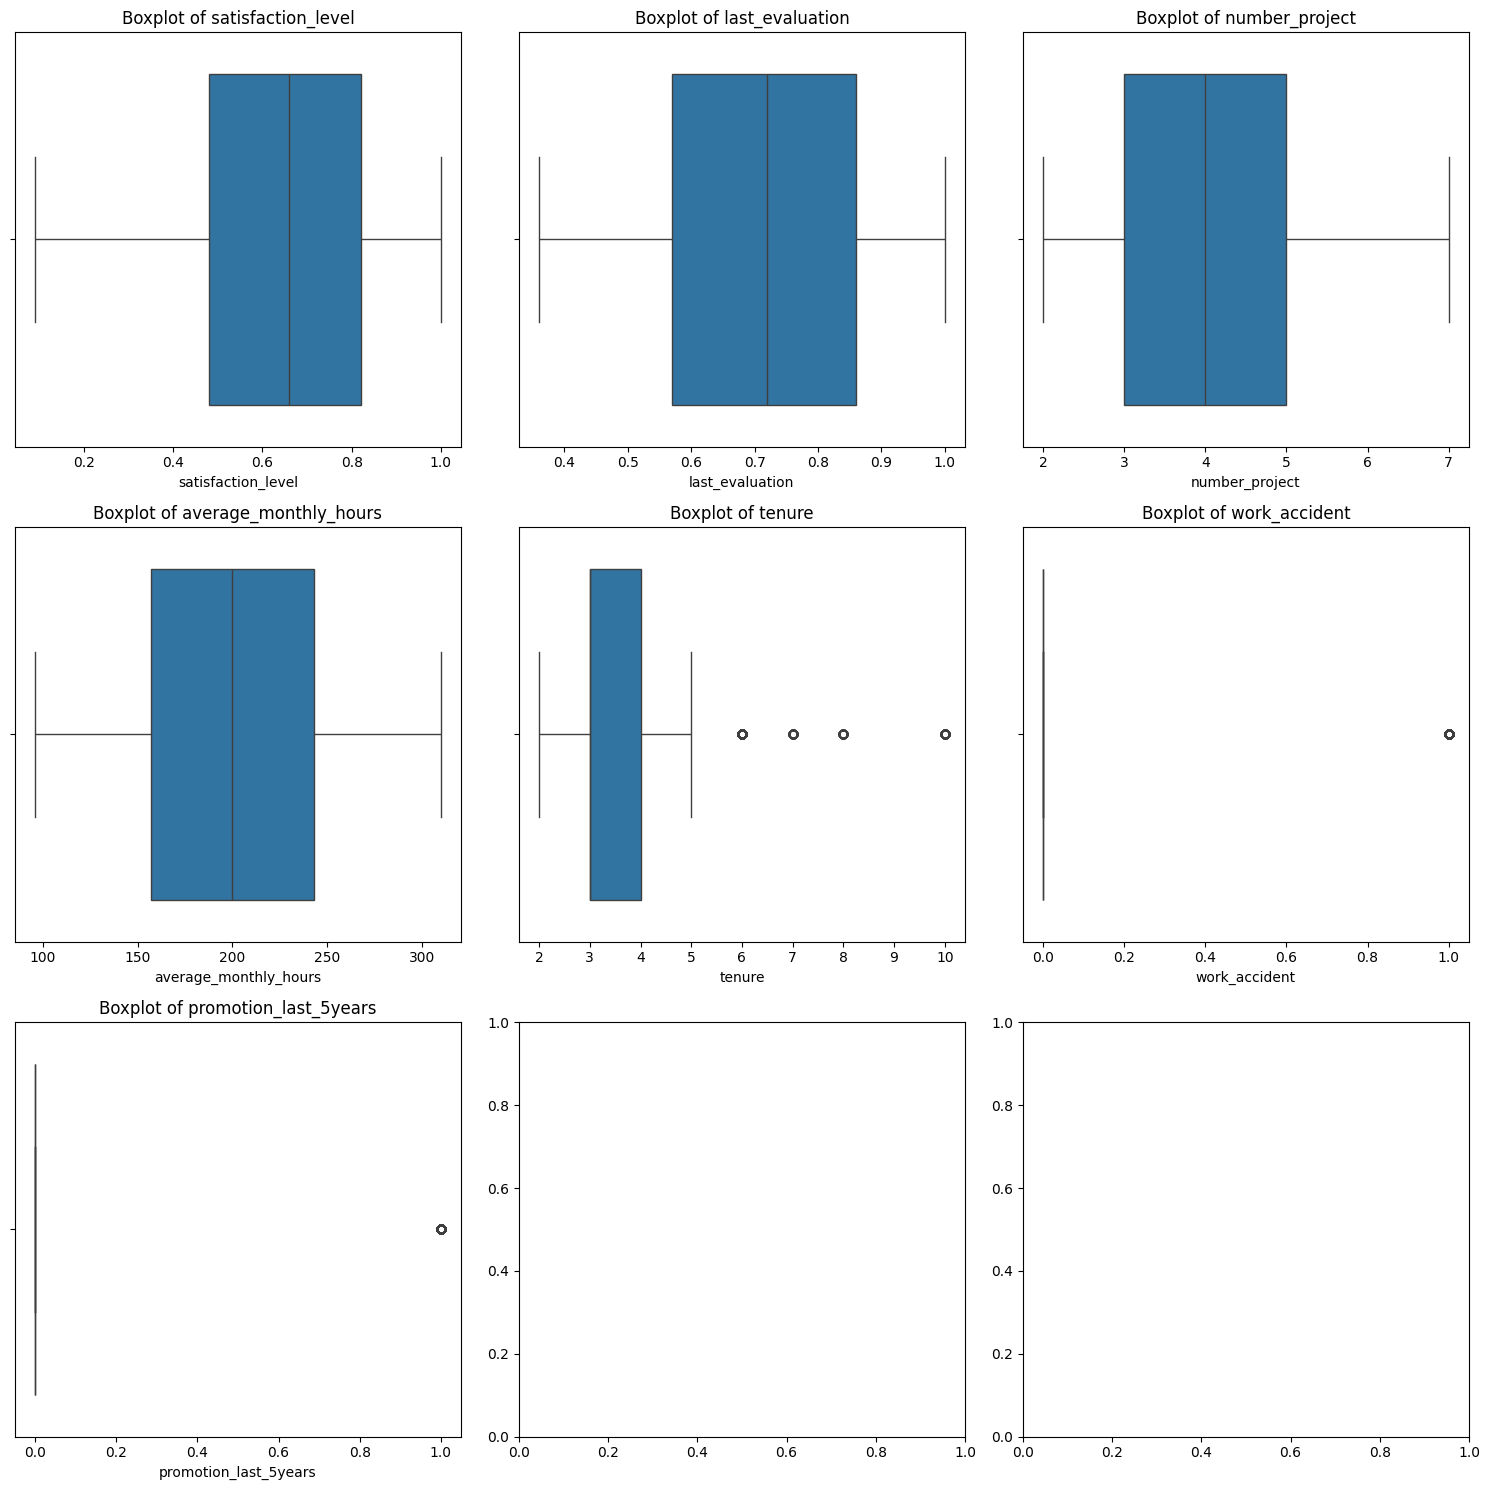

In [30]:
# prompt: Use subplots with a layout of 3 plots in a row and multiple rows for boxplots of the numerical columns in df1.

# Create subplots with a layout of 3 plots in a row and multiple rows for boxplots of the numerical columns in df1.
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', \
            'work_accident', 'promotion_last_5years']
num_rows = len(num_cols) // 3 + (len(num_cols) % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df1[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

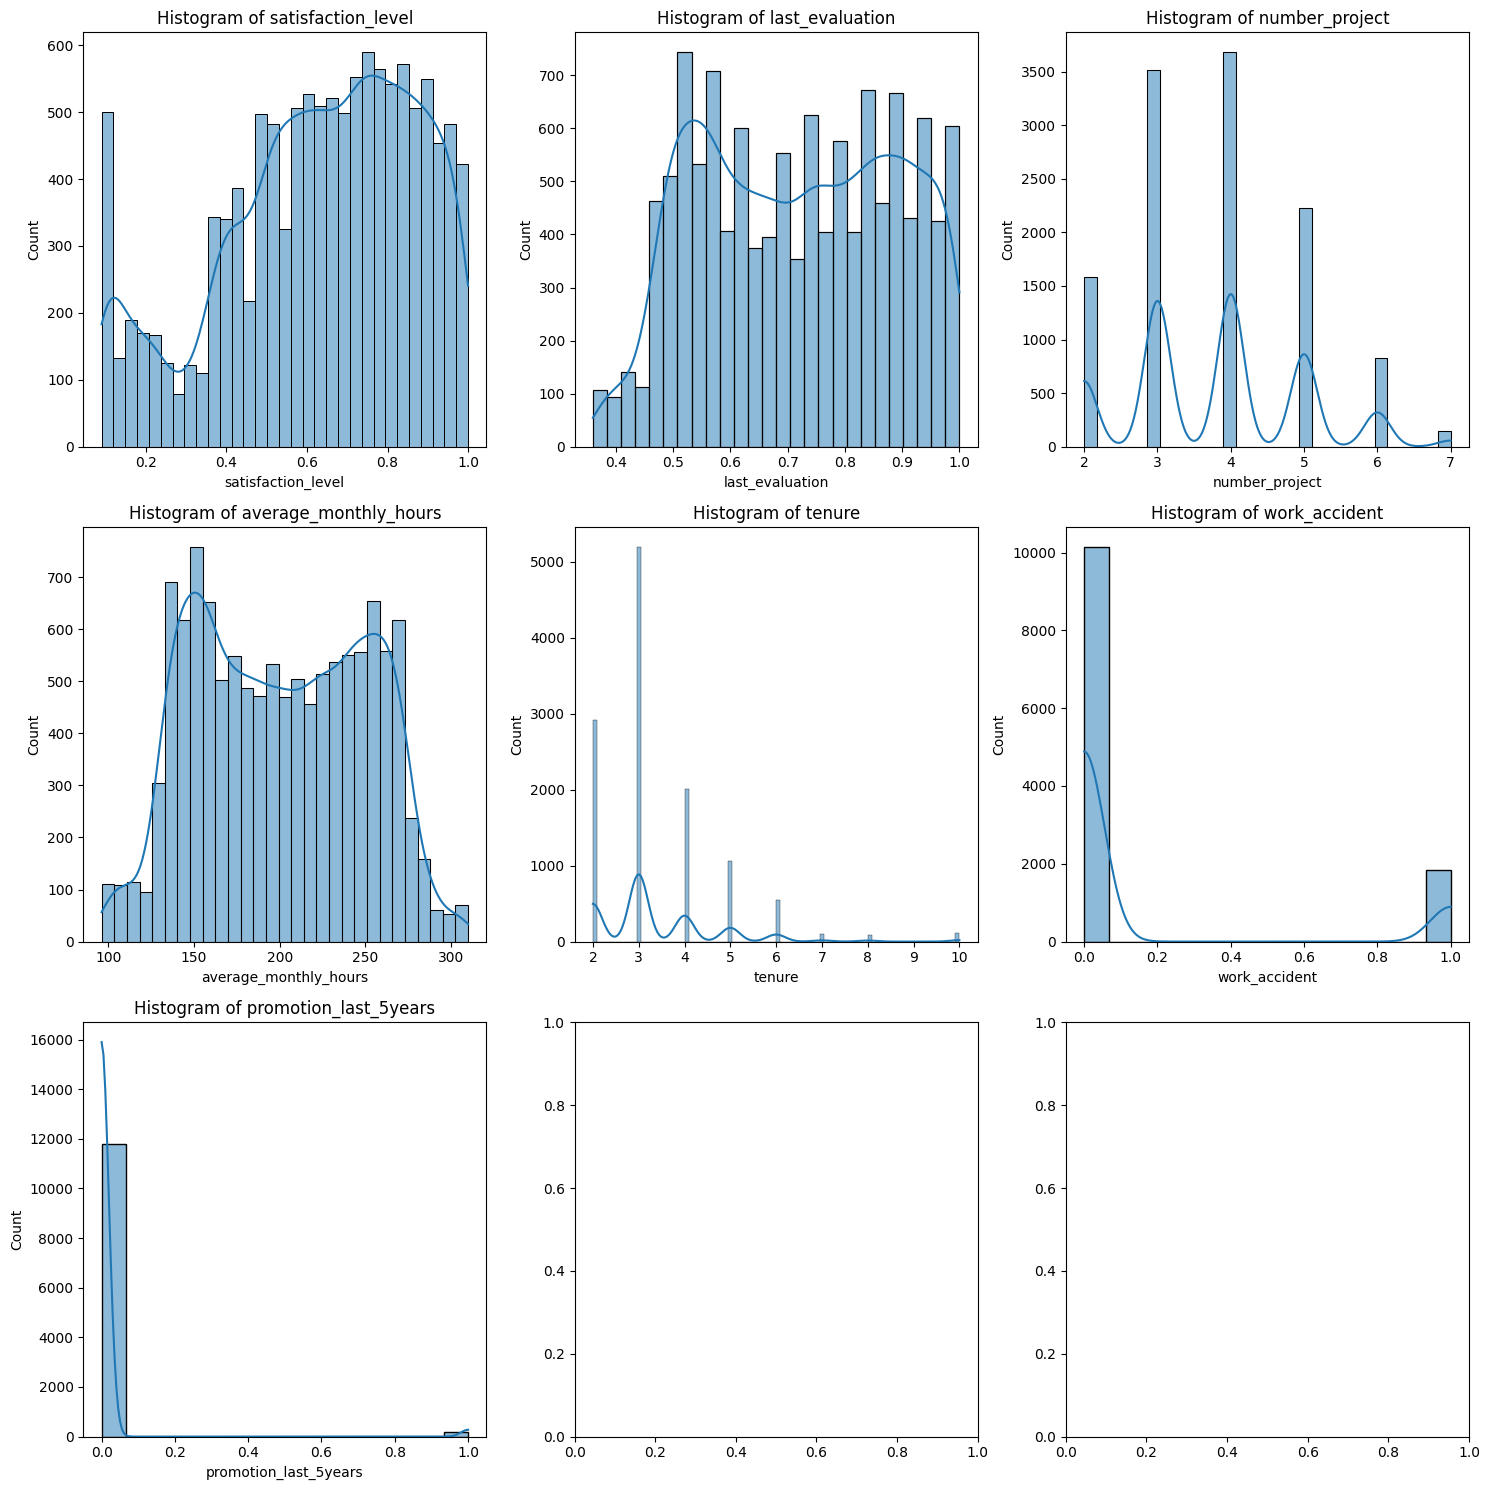

In [31]:
# prompt: Use subplots with a layout of 3 plots in a row and multiple rows for histograms of the numerical columns in df1.

# Create subplots with a layout of 3 plots in a row and multiple rows for histograms of the numerical columns in df1.
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', \
            'work_accident', 'promotion_last_5years']
num_rows = len(num_cols) // 3 + (len(num_cols) % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df1[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* What did you observe about the relationships between variables?
  * Referring to the correlation heatmap between the numeric variables of the dataset found later in this notebook, the strongest absolute correlation is between satisfaction_level and left.

* What do you observe about the distributions in the data?
  * Referring to the earlier histogram plots for the numeric variables:
    * satisfaction_level has two peaks, the first is around 0.0 and the second is around 0.8
    * last_evaluation, there is a uniform distribution starting around 0.5 to 1.0
    * number_project, the peak is at 4 and the maximum value is 7
    * average_monthly_hours has two peaks, the first is around 150 and the second is around 250
    * tenure, the peak is at 3 and the maximum value is 10
    * work_accident, around 10,000 employees chose 0.0 while the employees who chose 1.0 are a fifth of the 0.0 count
    * promotion_last_5years, around 12,000 employees chose 0.0 while only a relatively small number of employees chose 1.0
  * Referring to the value counts of the left variable, out of the 11,991 employees (duplicates were removed), only 1,991 employees (16.6%) left the company and the remaining 10,000 employees (83.4%) stayed.

* What transformations did you make with your data? Why did you chose to make those decisions?
  * The values of the salary categorical variable were encoded as follows: “low” = 0, “medium” = 1, “high” = 2. This encoding maintains the order of the values (low, medium, high).
  * The values of the department categorical variable were encoded based on their count, such that the value with the highest count is 0, and the second highest is 1, and so on. (“sales” = 0, “technical” = 1, etc.)

* What are some purposes of EDA before constructing a predictive model?Below is a list of reasons and purposes for applying EDA before constructing a predictive model:
  * Data isn't often structured exactly the way as needed.
  * Use EDA techniques to develop an understanding of what data is available and how it's structured.
  * Explore predictor variables, understanding the relationships that exist between variables in the dataset is essential to building a model that will produce valuable results.
  * Figure out how the data should be structured before building the model.

* What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
  * The results of a survey conducted by Human Resources on a sample of employees for their “satisfaction_level”, “last_evaluation” score, and so on.
  * Jupyter Notebook on Google Colaboratory

* Do you have any ethical considerations in this stage?

  Below is a list of considerations in regard to ethics, which we need to check at various stages of the PACE process.
  * Aggregate data and remove personally identifiable information to protect people and give them more control over their own data.
  * Will removing outliers to improve results, predictions, or forecasts change the data story?
  * Correlation is not causation.
  * Logistic regression, its logit being modeled in the form of multiple linear regression, can yield highly interpretable and communicable results. But because the underlying math could a bit more complex, be mindful of how results are conveyed and what the coefficients mean.
  * Prioritize fairness in the data that we have and will be used. Part of this responsible data stewardship is taking steps to reduce the potential of unintended consequences of machine learning applications.
  * Recognizing the potential for bias will help to minimize risk. Bias in machine learning is particularly deceptive because it stems from human bias. But because a computer makes the prediction, it's easy for the result to seem objective. Often, the bias is unintentional.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [32]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
display(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
display(df1['left'].value_counts(normalize=True))

,count
left,
0,10000
1,1991


,proportion
left,
0,0.833959
1,0.166041


In [33]:
# prompt: In df1, encode the values of `salary` as follows: "low" = 0, "medium" = 1, "high" = 2.

# Create a mapping dictionary for salary encoding
salary_mapping = {"low": 0, "medium": 1, "high": 2}

# Use the map function to encode the 'salary' column
df1['salary'] = df1['salary'].map(salary_mapping)


<ipython-input-33-5593ce729dc5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary'] = df1['salary'].map(salary_mapping)


In [34]:
# EXTRA
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [35]:
# prompt: In df1 encode the values of `department` in an order based on their count, such that the value with the highest count is 0 and the second highest is 1 and so on.

# Get the value counts of the 'department' column
department_counts = df1['department'].value_counts()

# Create a mapping dictionary for department encoding
department_mapping = {department: index for index, department in enumerate(department_counts.index)}
#display(department_mapping)
# Use the map function to encode the 'department' column
df1['department'] = df1['department'].map(department_mapping)


<ipython-input-35-9886e77d501d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['department'] = df1['department'].map(department_mapping)


In [36]:
# EXTRA
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [37]:
# EXTRA
#display(department_counts)

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [38]:
# EXTRA
corr = df1.corr(numeric_only=True)
corr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,-0.010203,0.029241
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.012335,-0.015775
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.010409,-0.000502
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,-0.002545,-0.000551
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.038311,0.038164
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003237,-0.000058
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.012436,-0.118882
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.057924,0.087851
department,-0.010203,0.012335,-0.010409,-0.002545,0.038311,-0.003237,-0.012436,0.057924,1.000000,0.058987
salary,0.029241,-0.015775,-0.000502,-0.000551,0.038164,-0.000058,-0.118882,0.087851,0.058987,1.000000


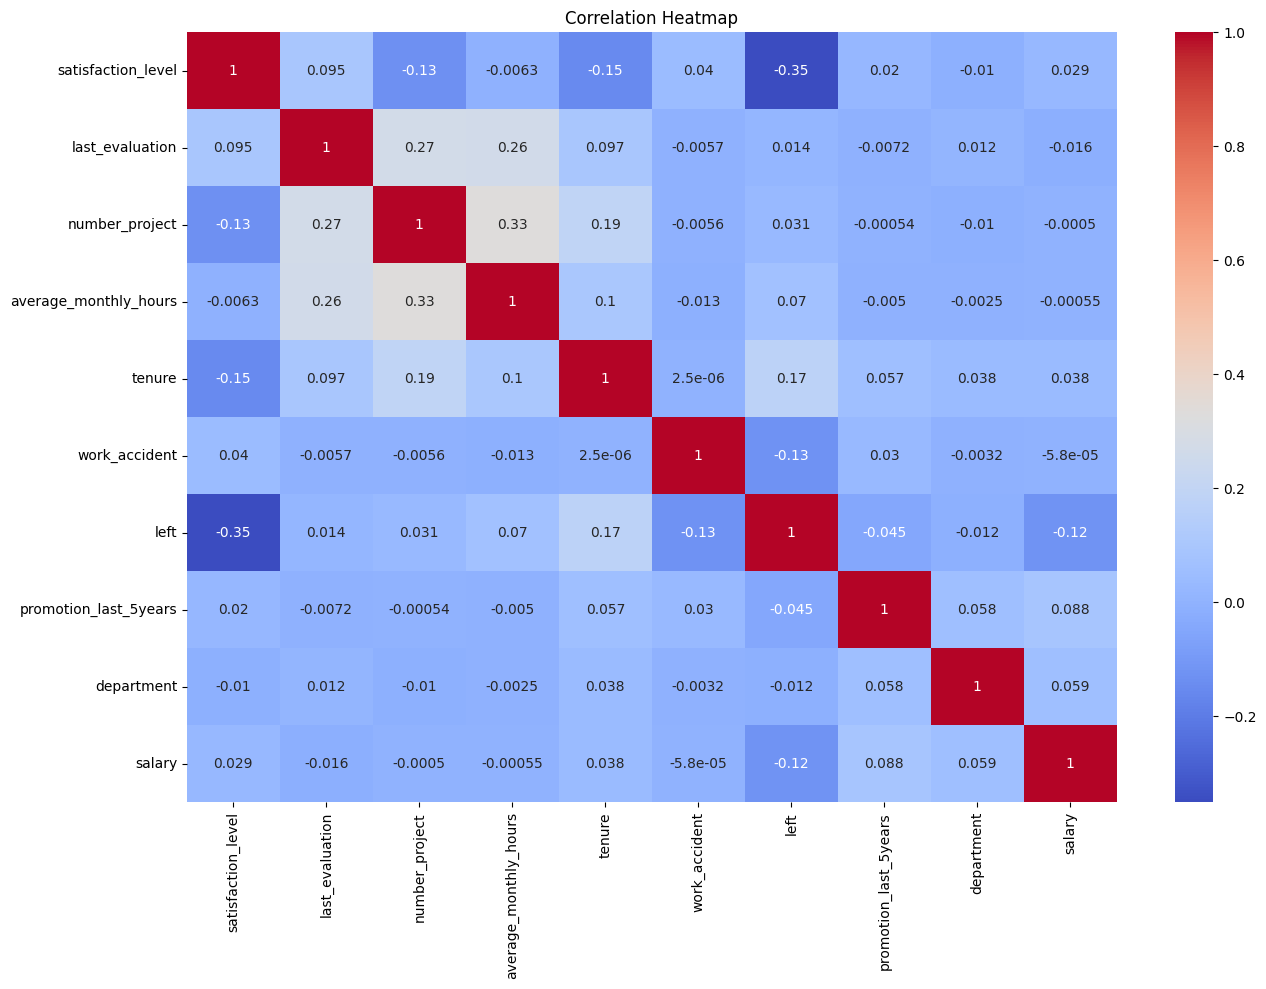

In [39]:
# EXTRA
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
# Create a plot as needed
### YOUR CODE HERE ###


In [41]:
# Create a plot as needed
### YOUR CODE HERE ###


In [42]:
# Create a plot as needed
### YOUR CODE HERE ###


In [43]:
# Create a plot as needed
### YOUR CODE HERE ###


In [44]:
# Create a plot as needed
### YOUR CODE HERE ###


In [45]:
# Create a plot as needed
### YOUR CODE HERE ###


In [46]:
# Create a plot as needed
### YOUR CODE HERE ###


In [47]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

What insights can you gather from the plots you created to visualize the data?
* Referring to the earlier correlation heatmap between the numeric variables of the dataset, aside from the target variable left, there does not appear to be any strong multicollinearity between the feature variables.

# Hypothesis Testing

The steps to conduct a two-sample t-test,


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (employees who left vs. employees who stayed).

* $H_0$: There is no difference in the average last_evaluation score between employees who left and employees who stayed.
* $H_A$: There is a difference in the average last_evaluation score between employees who left and employees who stayed.

Choose 5% as the significance level.

In [48]:
# 1. Isolate the `last_evaluation` column for employees who left.
left_last_evaluation = df1[df1['left'] == 1]['last_evaluation']

# 2. Isolate the `last_evaluation` column for employees who stayed.
stayed_last_evaluation = df1[df1['left'] == 0]['last_evaluation']

# 3. Perform the t-test
stats.ttest_ind(a=left_last_evaluation, b=stayed_last_evaluation, equal_var=False)

TtestResult(statistic=1.298040887576492, pvalue=0.1943906982070123, df=2549.55027139441)

* Since the p-value (0.1943906982070123) is larger than 0.05, fail to reject the null hypothesis.
* There is no statistically significant difference in the average number of last_evaluation scores between employees who left and employees who stayed.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


In [49]:
# EXTRA
df1.shape

(11991, 10)

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
  * Yes
- Observations are independent of each other
  * Each observation represents a response from each employee in the company. It is reasonable to assume that each response is independent to each other.
- No severe multicollinearity among X variables
  * Referring to the above correlation heatmap, aside from the target variable left, there does not appear to be any X variables that are strongly multicollinear to each other.
- No extreme outliers
  * There are no extreme outliers in the tenure column.
- Linear relationship between each X variable and the logit of the outcome variable
  * As demonstrated by a later heatmap for correlation among features and the logit, the logit of left has a strong absolute correlation with satisfaction_level, followed by work_accident, tenure, salary, and so on.
- Sufficiently large sample size
  * The modeling dataset contains 11,991 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process (splitting data into train/validation/test sets), but still doable.





In [50]:
# EXTRA
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  int64  
 9   salary                 11991 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.0 MB


In [51]:
# EXTRA
X = df1.drop(columns=['left'])
y = df1['left']

In [52]:
# EXTRA
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [53]:
# EXTRA
for x in [X_train, X_val, X_test]:
    print(x.shape)

(7194, 9)
(2398, 9)
(2399, 9)


# Logistic Regression

In [54]:
%%time
# EXTRA
logistic_model = LogisticRegression(penalty=None, max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

CPU times: user 353 ms, sys: 235 ms, total: 588 ms
Wall time: 415 ms


LogisticRegression(max_iter=1000, penalty=None, random_state=42)

In [55]:
# EXTRA
logistic_coeff = pd.Series(logistic_model.coef_[0], index=X.columns)
logistic_coeff.sort_values(ascending=False)
logistic_coeff

,0
satisfaction_level,-3.793415
last_evaluation,0.775214
number_project,-0.248286
average_monthly_hours,0.003762
tenure,0.293915
work_accident,-1.292275
promotion_last_5years,-0.880556
department,-0.018535
salary,-0.645522


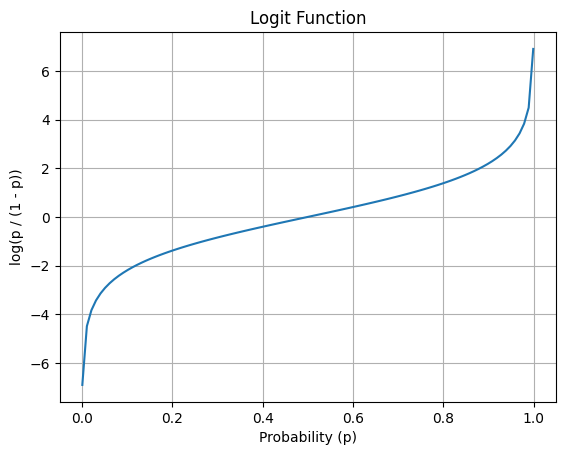

In [56]:
# prompt: Show a plot for log(p/(1-p)) function for p in the range of 0.001 to 0.999.

#import matplotlib.pyplot as plt
#import numpy as np

# Create a range of probabilities
p = np.linspace(0.001, 0.999, 100)

# Calculate the logit function
logit = np.log(p / (1 - p))

# Plot the logit function
plt.plot(p, logit)
plt.xlabel('Probability (p)')
plt.ylabel('log(p / (1 - p))')
plt.title('Logit Function')
plt.grid(True)
plt.show()


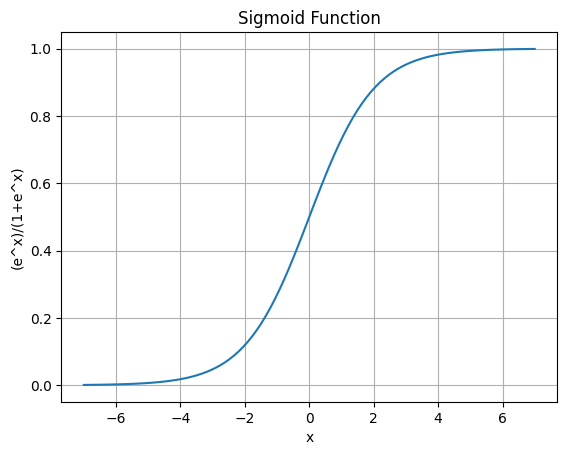

In [57]:
# prompt: Show a plot for (e^x)/(1+e^x) function for x in the range of -7 to 7

#import numpy as np
#import matplotlib.pyplot as plt

# Create a range of x values
x = np.linspace(-7, 7, 100)

# Calculate the function
y = np.exp(x) / (1 + np.exp(x))

# Plot the function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('(e^x)/(1+e^x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()


In [58]:
# EXTRA
logistic_model.intercept_

array([-0.37222732])

In [59]:
# EXTRA
logistic_train_prob = logistic_model.predict_proba(X_train)
logistic_train_prob

array([[0.5594035 , 0.4405965 ],
       [0.92779072, 0.07220928],
       [0.93798597, 0.06201403],
       ...,
       [0.94992714, 0.05007286],
       [0.85530325, 0.14469675],
       [0.96811424, 0.03188576]])

In [60]:
# EXTRA
logit_data = X_train.copy()
logit_data['logit'] = np.log(logistic_train_prob[:,1] / logistic_train_prob[:,0])
logit_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary,logit
6439,0.18,0.92,5,251,4,0,0,7,1,-0.238742
7131,0.78,0.65,3,154,2,0,0,8,0,-2.553238
4955,0.93,0.66,4,228,3,0,0,4,0,-2.716374
3017,0.98,0.78,4,155,3,1,0,1,0,-4.324280
8258,0.50,0.84,3,233,3,1,0,0,1,-2.542230


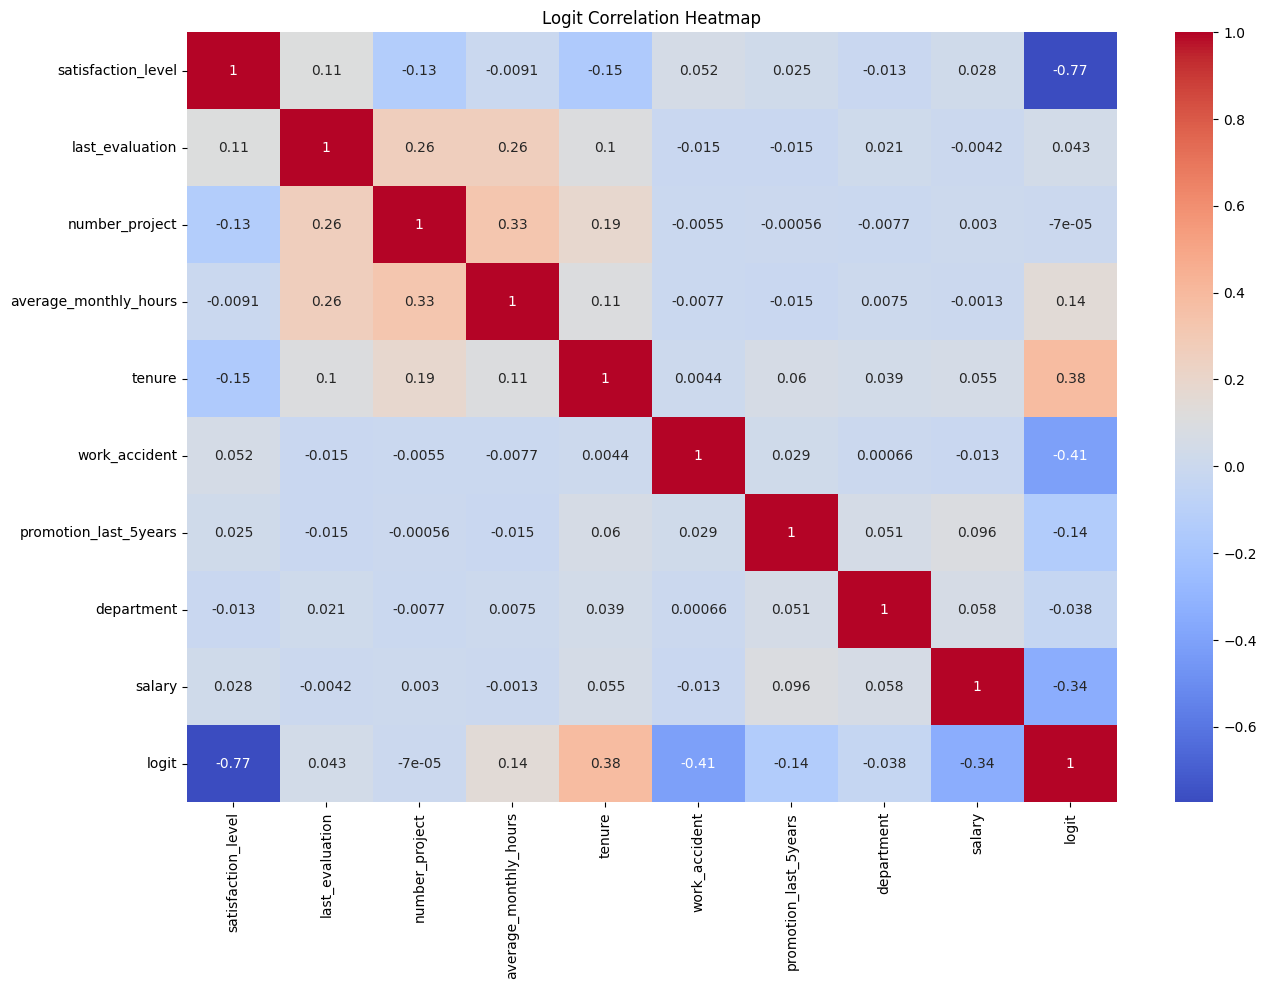

In [61]:
# EXTRA
logit_corr = logit_data.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(logit_corr, annot=True, cmap='coolwarm')
#sns.heatmap(df.logit_corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Logit Correlation Heatmap')
plt.show()

In [62]:
# EXTRA
y_preds = logistic_model.predict(X_val)
y_preds

array([1, 0, 0, ..., 0, 0, 0])

In [63]:
# EXTRA, accuracy
logistic_model.score(X_val, y_val)

0.835279399499583

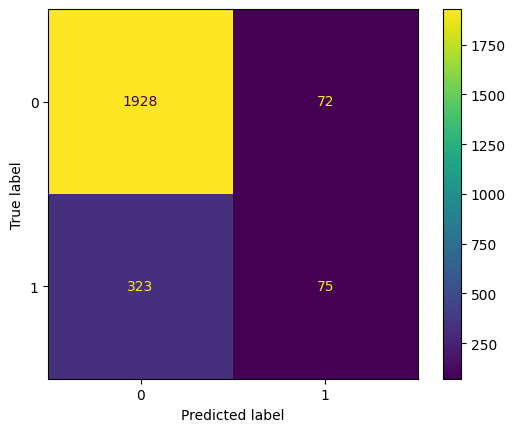

In [64]:
# EXTRA
cm = confusion_matrix(y_val, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

In [65]:
# EXTRA
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [66]:
# EXTRA
results = get_test_scores('Logistic Regression', y_preds, y_val)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279


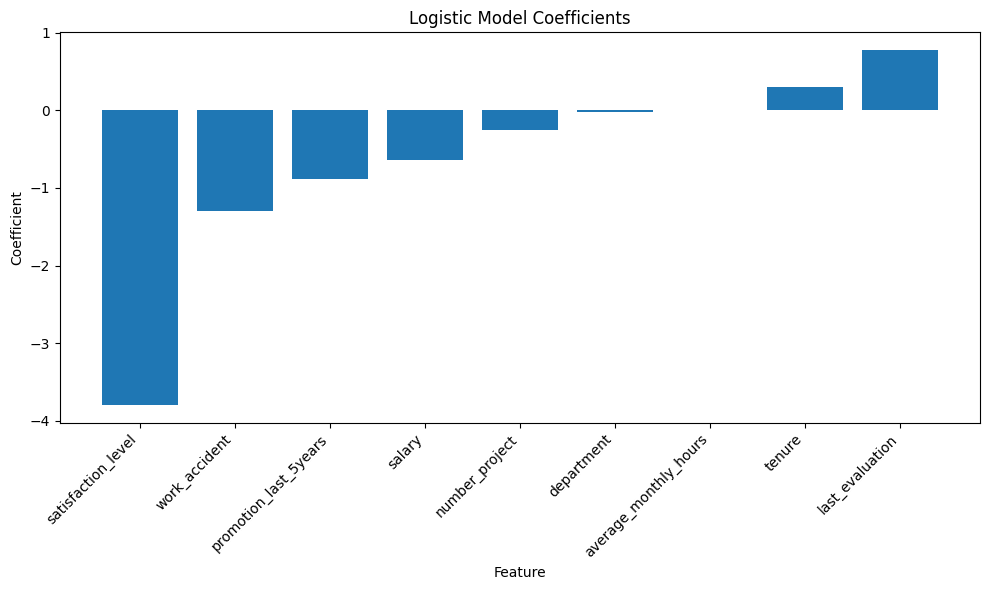

In [67]:
# EXTRA
coefficients_list = [(column, coefficient) for column, coefficient in zip(X.columns, logistic_model.coef_[0])]
coefficients_list_sorted = sorted(coefficients_list, key=lambda x: x[1])

# Extract column names and coefficients
column_names, coefficients = zip(*coefficients_list_sorted)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(column_names, coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Model Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Logistic Regression - Dropping Irrelevant Features

In [68]:
# prompt: For X_train, drop the columns `last_evaluation`, `number_project`, and `department`, assign the results into a new variable called X_train_drop

X_train_drop = X_train.drop(columns=['last_evaluation', 'number_project', 'department'])
X_train_drop.head()


,satisfaction_level,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary
6439,0.18,251,4,0,0,1
7131,0.78,154,2,0,0,0
4955,0.93,228,3,0,0,0
3017,0.98,155,3,1,0,0
8258,0.50,233,3,1,0,1


In [69]:
%%time
# EXTRA
logistic_model_drop = LogisticRegression(penalty=None, max_iter=1000, random_state=42)
logistic_model_drop.fit(X_train_drop, y_train)

CPU times: user 70 ms, sys: 43.6 ms, total: 114 ms
Wall time: 122 ms


LogisticRegression(max_iter=1000, penalty=None, random_state=42)

In [70]:
# EXTRA
logistic_coeff = pd.Series(logistic_model_drop.coef_[0], index=X_train_drop.columns)
logistic_coeff.sort_values(ascending=False)
logistic_coeff

,0
satisfaction_level,-3.470066
average_monthly_hours,0.001855
tenure,0.267239
work_accident,-1.309231
promotion_last_5years,-0.458200
salary,-0.653152


In [71]:
# EXTRA
logistic_model_drop.intercept_

array([-0.4979911])

In [72]:
# EXTRA
logistic_train_prob = logistic_model_drop.predict_proba(X_train_drop)
logistic_train_prob

array([[0.56001366, 0.43998634],
       [0.91563843, 0.08436157],
       [0.9241781 , 0.0758219 ],
       ...,
       [0.94969512, 0.05030488],
       [0.83844474, 0.16155526],
       [0.96398971, 0.03601029]])

In [73]:
# EXTRA
logit_data_drop = X_train_drop.copy()
logit_data_drop['logit'] = np.log(logistic_train_prob[:,1] / logistic_train_prob[:,0])
logit_data_drop.head()

,satisfaction_level,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,logit
6439,0.18,251,4,0,0,1,-0.241217
7131,0.78,154,2,0,0,0,-2.384510
4955,0.93,228,3,0,0,0,-2.500518
3017,0.98,155,3,1,0,0,-4.118660
8258,0.50,233,3,1,0,1,-2.961497


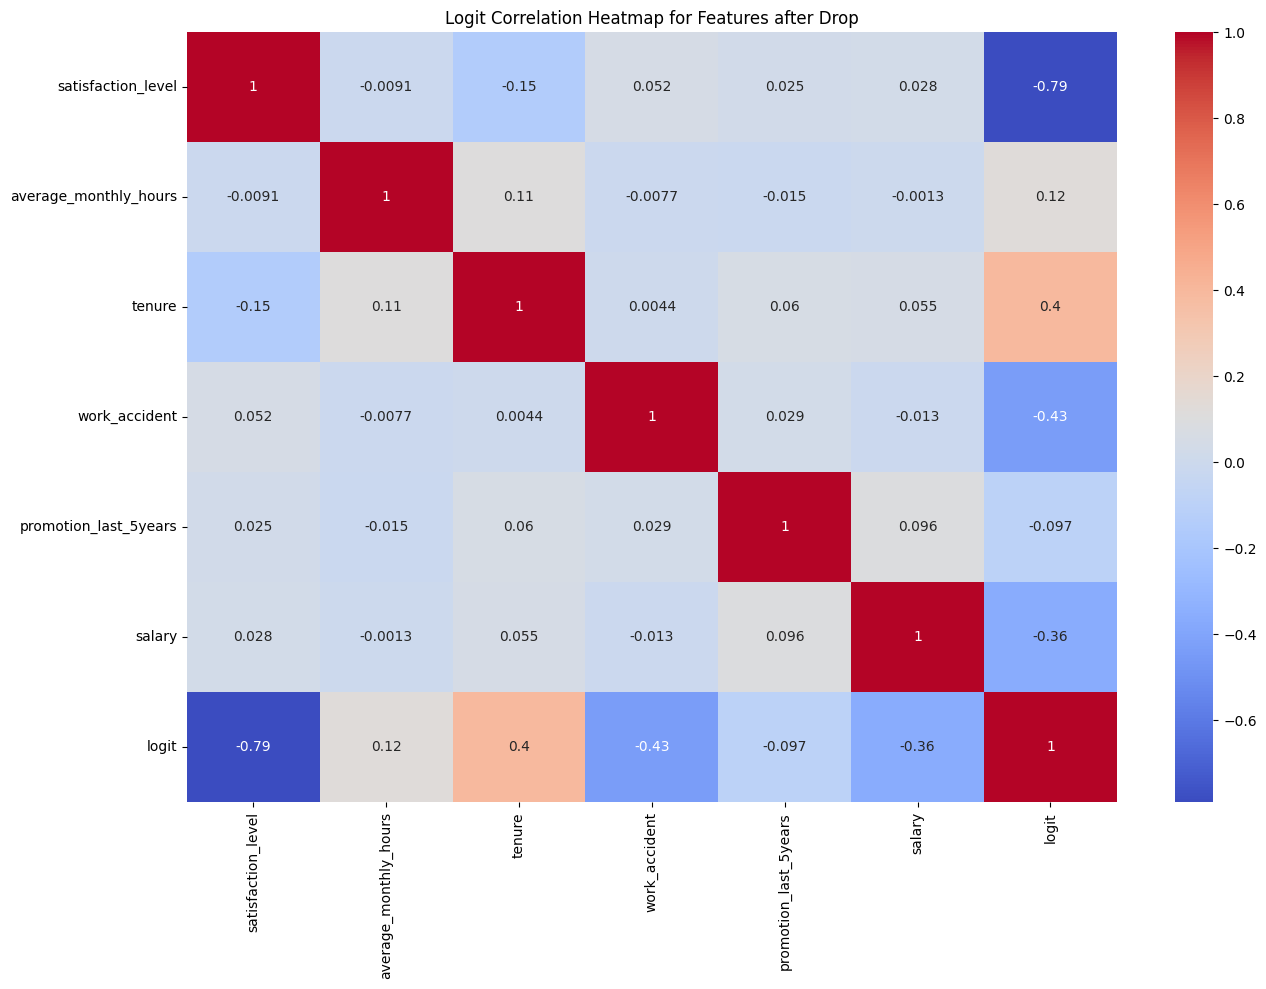

In [74]:
# EXTRA
logit_corr = logit_data_drop.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(logit_corr, annot=True, cmap='coolwarm')
#sns.heatmap(df.logit_corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Logit Correlation Heatmap for Features after Drop')
plt.show()

In [75]:
# EXTRA
X_val_drop = X_val.drop(columns=['last_evaluation', 'number_project', 'department'])
X_val_drop.head()

,satisfaction_level,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary
9243,0.14,215,5,0,0,0
7806,0.12,162,4,1,0,1
7245,0.75,150,2,0,0,0
10061,0.96,215,4,0,0,0
11067,0.51,185,3,0,0,0


In [76]:
# EXTRA
y_preds = logistic_model_drop.predict(X_val_drop)
y_preds

array([1, 0, 0, ..., 0, 0, 0])

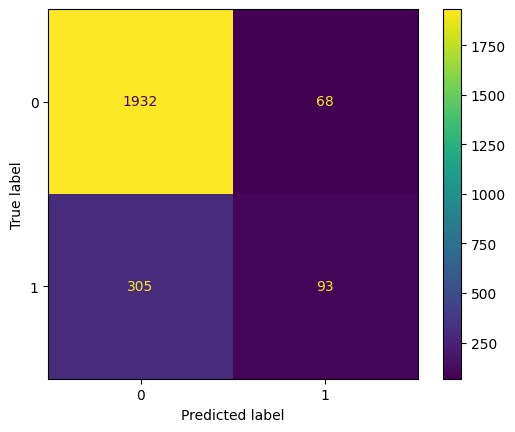

In [77]:
# EXTRA
cm = confusion_matrix(y_val, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model_drop.classes_)
disp.plot()
plt.show()

In [78]:
# EXTRA
lr_drop_results = get_test_scores('Logistic Regression Drop', y_preds, y_val)
results = pd.concat([results, lr_drop_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279
0,Logistic Regression Drop,0.577640,0.233668,0.332737,0.844454


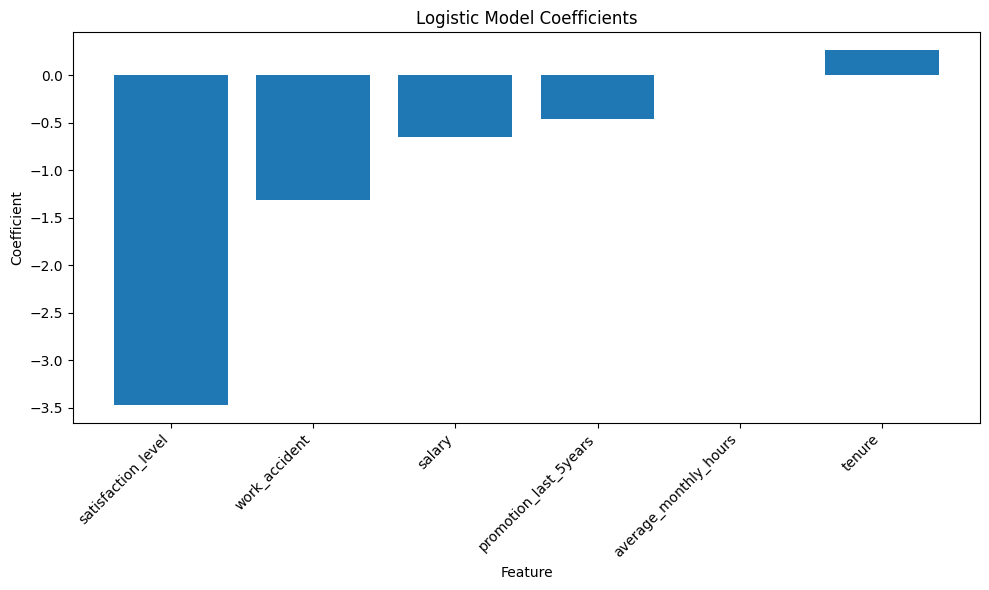

In [79]:
# EXTRA
coefficients_list = [(column, coefficient) for column, coefficient in zip(X_train_drop.columns, logistic_model_drop.coef_[0])]
coefficients_list_sorted = sorted(coefficients_list, key=lambda x: x[1])

# Extract column names and coefficients
column_names, coefficients = zip(*coefficients_list_sorted)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(column_names, coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Model Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Logistic Regression - Dropping Irrelevant Features and Standardize Features

In [80]:
# EXTRA
scaler_drop = StandardScaler().fit(X_train_drop)
X_train_drop_scaled = scaler_drop.transform(X_train_drop)
print('X_train_drop scaled:', X_train_drop_scaled)

X_train_drop scaled: [[-1.86758677  1.0333906   0.46062265 -0.42531515 -0.13351713  0.61634553]
 [ 0.62426082 -0.96598435 -1.02969411 -0.42531515 -0.13351713 -0.95098913]
 [ 1.24722272  0.559312   -0.28453573 -0.42531515 -0.13351713 -0.95098913]
 ...
 [ 0.58273002 -0.2445604  -1.02969411 -0.42531515 -0.13351713  0.61634553]
 [-0.53860139  0.72420891 -0.28453573 -0.42531515 -0.13351713  0.61634553]
 [ 1.3718151  -1.41945083  1.9509394  -0.42531515 -0.13351713  2.18368019]]


In [81]:
%%time
# EXTRA
logistic_model_drop_scaled = LogisticRegression(penalty=None, max_iter=1000, random_state=42)
logistic_model_drop_scaled.fit(X_train_drop_scaled, y_train)

CPU times: user 19 ms, sys: 2.04 ms, total: 21.1 ms
Wall time: 21.5 ms


LogisticRegression(max_iter=1000, penalty=None, random_state=42)

In [82]:
# EXTRA
logistic_coeff = pd.Series(logistic_model_drop_scaled.coef_[0], index=X_train_drop.columns)
logistic_coeff.sort_values(ascending=False)
logistic_coeff

,0
satisfaction_level,-0.828627
average_monthly_hours,0.093324
tenure,0.364797
work_accident,-0.468242
promotion_last_5years,-0.127028
salary,-0.411920


In [83]:
# EXTRA
logistic_model_drop_scaled.intercept_

array([-2.0137146])

In [84]:
# EXTRA
logistic_train_prob = logistic_model_drop_scaled.predict_proba(X_train_drop_scaled)
logistic_train_prob

array([[0.55958606, 0.44041394],
       [0.91597925, 0.08402075],
       [0.92350533, 0.07649467],
       ...,
       [0.94944459, 0.05055541],
       [0.83772548, 0.16227452],
       [0.96283813, 0.03716187]])

In [85]:
# EXTRA
logit_data_drop = X_train_drop.copy()
logit_data_drop['logit'] = np.log(logistic_train_prob[:,1] / logistic_train_prob[:,0])
logit_data_drop.head()

,satisfaction_level,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,logit
6439,0.18,251,4,0,0,1,-0.239482
7131,0.78,154,2,0,0,0,-2.388930
4955,0.93,228,3,0,0,0,-2.490956
3017,0.98,155,3,1,0,0,-4.103526
8258,0.50,233,3,1,0,1,-2.947251


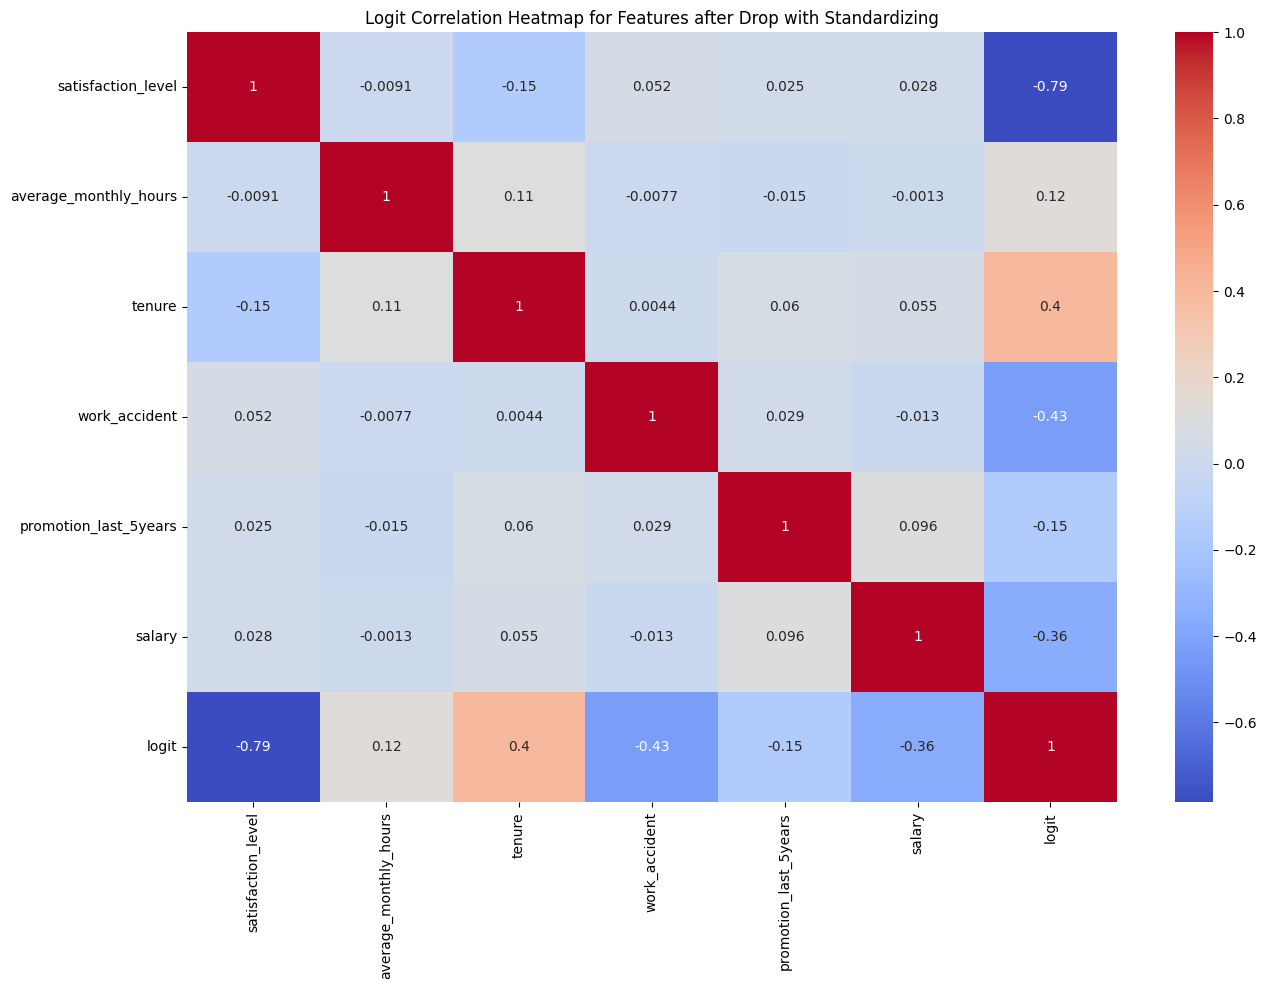

In [86]:
# EXTRA
logit_corr = logit_data_drop.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(logit_corr, annot=True, cmap='coolwarm')
#sns.heatmap(df.logit_corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Logit Correlation Heatmap for Features after Drop with Standardizing')
plt.show()

In [87]:
# EXTRA
X_val_drop_scaled = scaler_drop.transform(X_val_drop)

In [88]:
# EXTRA
y_preds = logistic_model_drop_scaled.predict(X_val_drop_scaled)
y_preds

array([1, 0, 0, ..., 0, 0, 0])

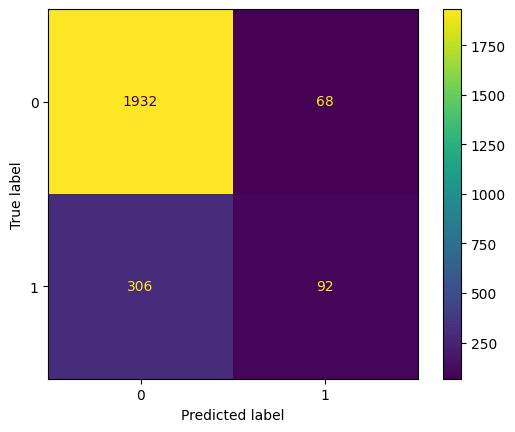

In [89]:
# EXTRA
cm = confusion_matrix(y_val, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model_drop_scaled.classes_)
disp.plot()
plt.show()

In [90]:
# EXTRA
lr_drop_scaled_results = get_test_scores('Logistic Regression Drop Scaled', y_preds, y_val)
results = pd.concat([results, lr_drop_scaled_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279
0,Logistic Regression Drop,0.577640,0.233668,0.332737,0.844454
0,Logistic Regression Drop Scaled,0.575000,0.231156,0.329749,0.844037


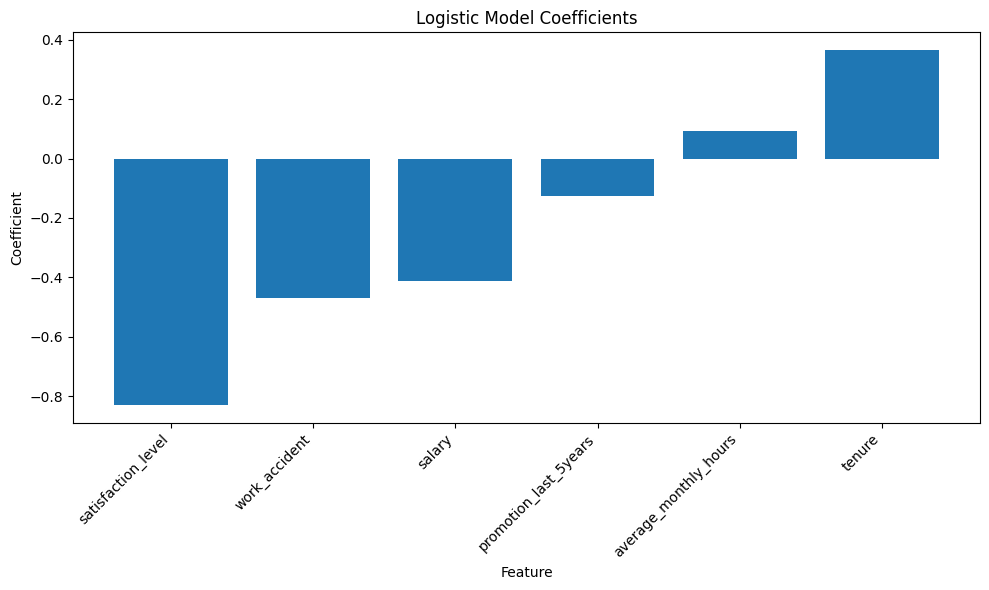

In [91]:
# EXTRA
coefficients_list = [(column, coefficient) for column, coefficient in zip(X_train_drop.columns, logistic_model_drop_scaled.coef_[0])]
coefficients_list_sorted = sorted(coefficients_list, key=lambda x: x[1])

# Extract column names and coefficients
column_names, coefficients = zip(*coefficients_list_sorted)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(column_names, coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Model Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Decision Tree

In [92]:
# EXTRA
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_val)

In [93]:
# EXTRA
dt_model

DecisionTreeClassifier(random_state=42)

In [94]:
# EXTRA
dt_results = get_test_scores('Decision Tree', dt_pred, y_val)
results = pd.concat([results, dt_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279
0,Logistic Regression Drop,0.577640,0.233668,0.332737,0.844454
0,Logistic Regression Drop Scaled,0.575000,0.231156,0.329749,0.844037
0,Decision Tree,0.916049,0.932161,0.924035,0.974562


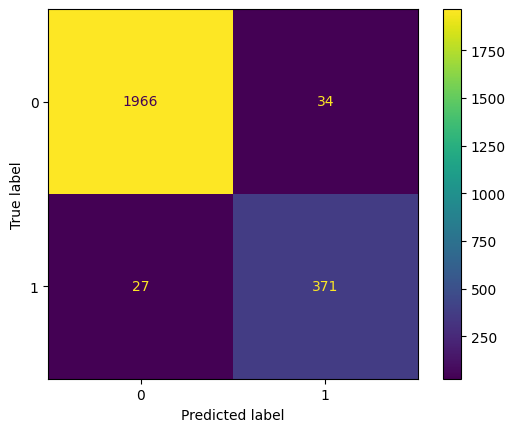

In [95]:
# EXTRA
cm = confusion_matrix(y_val, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot()
plt.show()

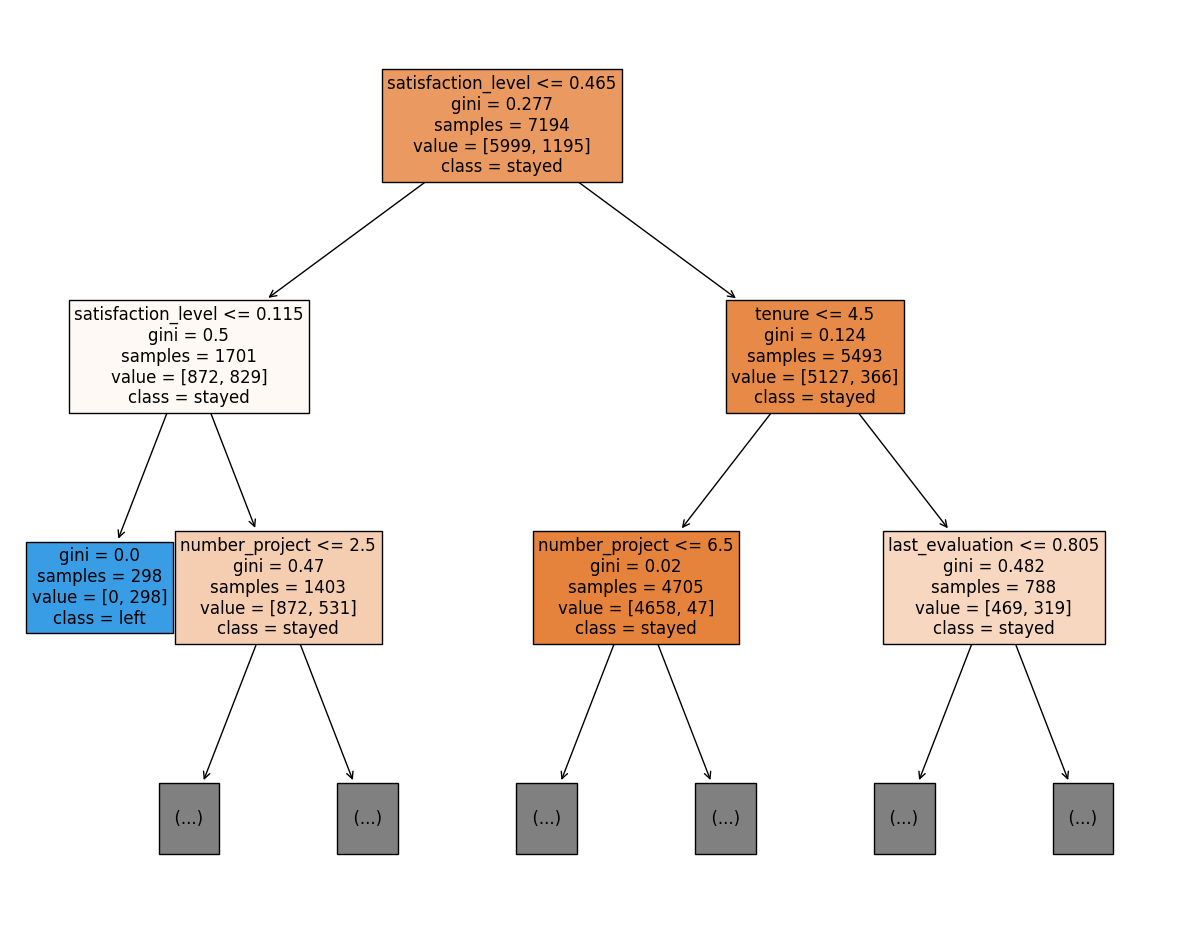

In [96]:
# EXTRA
plt.figure(figsize=(15,12))
plot_tree(dt_model, max_depth=2, fontsize=12, feature_names=X_val.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

# Decision Tree CV

In [97]:
%%time
# EXTRA
tree_param = {'max_depth':[1,2,3,4,5,None],
              'min_samples_leaf': [1, 2, 5]}
scoring = ['accuracy', 'precision', 'recall', 'f1']
tuned_decision_tree = DecisionTreeClassifier(random_state=42)
gs_dt = GridSearchCV(tuned_decision_tree, param_grid=tree_param, scoring=scoring, refit='recall', cv=5, n_jobs=-1)
gs_dt.fit(X_train, y_train)

CPU times: user 274 ms, sys: 136 ms, total: 409 ms
Wall time: 4.54 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 5]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [98]:
# EXTRA
gs_dt.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

In [99]:
# EXTRA
gs_dt_pred = gs_dt.best_estimator_.predict(X_val)
gs_dt_results = get_test_scores('Decision Tree CV', gs_dt_pred, y_val)
results = pd.concat([results, gs_dt_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279
0,Logistic Regression Drop,0.577640,0.233668,0.332737,0.844454
0,Logistic Regression Drop Scaled,0.575000,0.231156,0.329749,0.844037
0,Decision Tree,0.916049,0.932161,0.924035,0.974562
0,Decision Tree CV,0.828508,0.934673,0.878394,0.957048


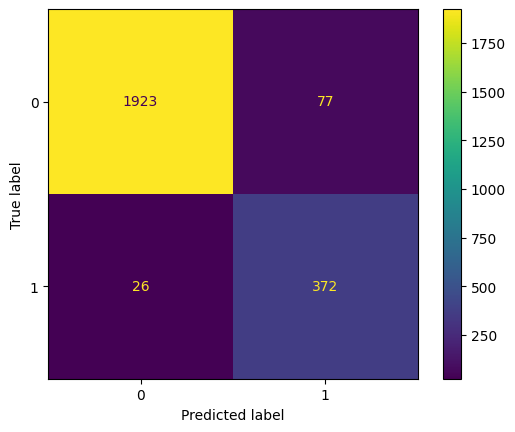

In [100]:
# EXTRA
cm = confusion_matrix(y_val, gs_dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_dt.best_estimator_.classes_)
disp.plot()
plt.show()

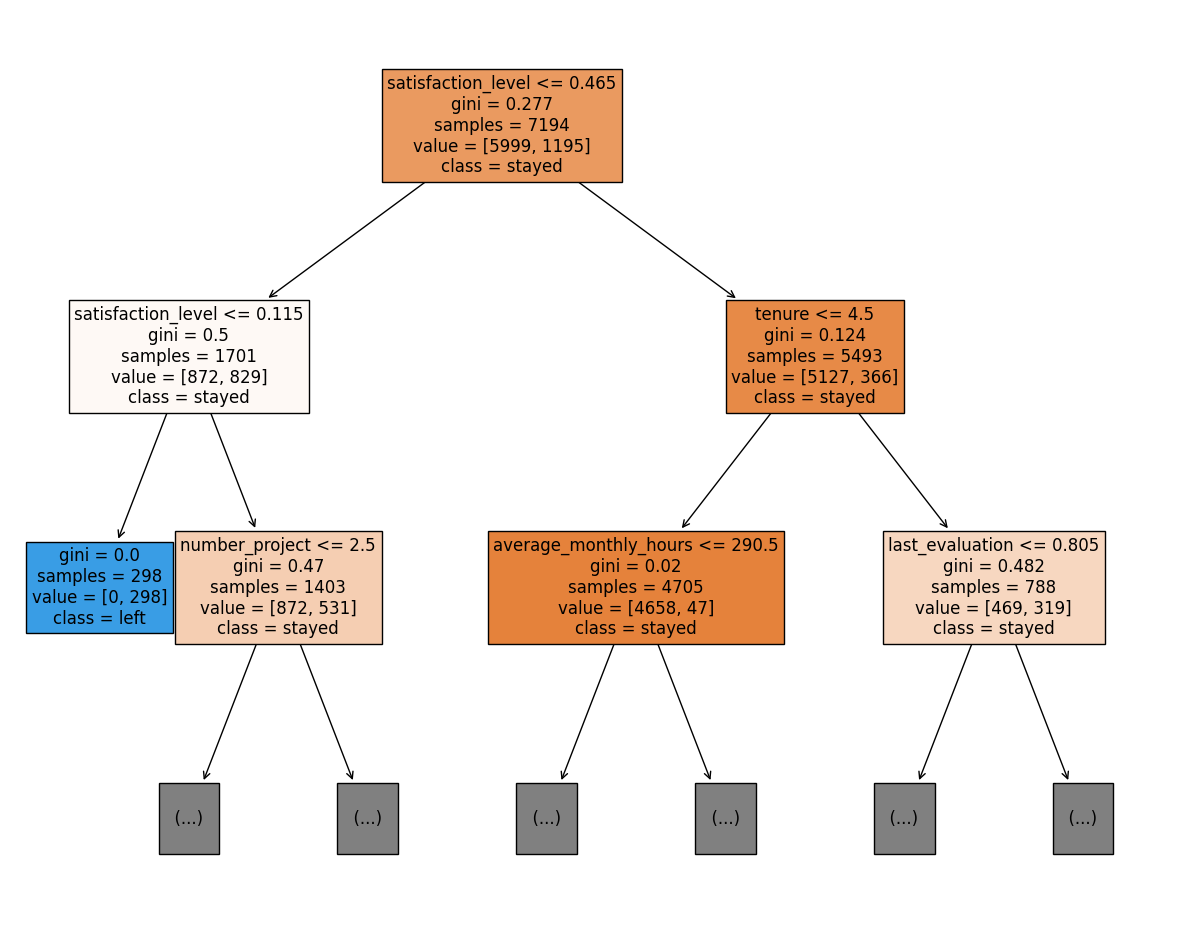

In [101]:
# EXTRA
plt.figure(figsize=(15,12))
plot_tree(gs_dt.best_estimator_, max_depth=2, fontsize=12, feature_names=X_val.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

# Random Forest CV

In [102]:
# EXTRA
#rf_model = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [3,5,7,None],
             'max_features': [0.6,0.8,0.9,1.0],
             'max_samples': [0.7,0.8,0.9,1.0],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3,4],
             'n_estimators': [200,300,400],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

#rf_cv = GridSearchCV(rf_model, cv_params, scoring=scoring, cv=5, refit='recall', verbose=2)

In [103]:
# EXTRA write/read pickle
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [104]:
%%time
# EXTRA
#rf_cv.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs


In [105]:
# EXTRA
#write_pickle(path, rf_cv, 'rf_cv')

In [106]:
# EXTRA
rf_cv = read_pickle(path, 'rf_cv')

In [107]:
# EXTRA
rf_cv.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [108]:
# EXTRA
rf_cv_pred = rf_cv.best_estimator_.predict(X_val)
rf_cv_results = get_test_scores('Random Forest CV', rf_cv_pred, y_val)
results = pd.concat([results, rf_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279
0,Logistic Regression Drop,0.577640,0.233668,0.332737,0.844454
0,Logistic Regression Drop Scaled,0.575000,0.231156,0.329749,0.844037
0,Decision Tree,0.916049,0.932161,0.924035,0.974562
0,Decision Tree CV,0.828508,0.934673,0.878394,0.957048
0,Random Forest CV,0.966146,0.932161,0.948849,0.983319


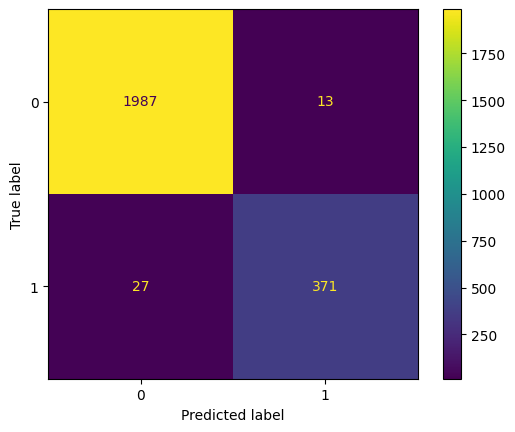

In [109]:
# EXTRA
cm = confusion_matrix(y_val, rf_cv_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.best_estimator_.classes_)
disp.plot()
plt.show()

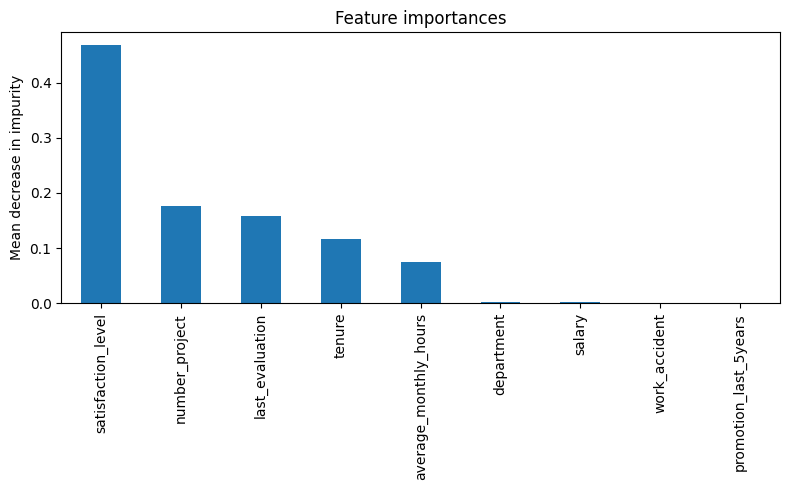

In [110]:
# EXTRA
importances = rf_cv.best_estimator_.feature_importances_
rf_cv_importances = pd.Series(importances, index=X_val.columns)
rf_cv_importances = rf_cv_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_cv_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

In [111]:
# EXTRA
rf_cv_importances

,0
satisfaction_level,0.468161
number_project,0.176654
last_evaluation,0.158874
tenure,0.116837
average_monthly_hours,0.075318
department,0.002322
salary,0.001640
work_accident,0.000174
promotion_last_5years,0.000021


In [112]:
# prompt: Add the values in rf_cv_importances and display the sum.

sum_rf_cv_importances = rf_cv_importances.sum()
print("Sum of rf_cv_importances:", sum_rf_cv_importances)


Sum of rf_cv_importances: 0.9999999999999999


# Random Forest CV with least important features dropped

In [113]:
# EXTRA
X_train_drop_2 = X_train.drop(columns=['department', 'salary', 'work_accident', 'promotion_last_5years'])
X_train_drop_2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure
6439,0.18,0.92,5,251,4
7131,0.78,0.65,3,154,2
4955,0.93,0.66,4,228,3
3017,0.98,0.78,4,155,3
8258,0.50,0.84,3,233,3


In [114]:
# EXTRA
#rf_model = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [5,7,None],
             'max_features': [0.9,1.0],
             'max_samples': [0.7,0.8,0.9],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2],
             'n_estimators': [200,300],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

#rf_cv_drop_2 = GridSearchCV(rf_model, cv_params, scoring=scoring, cv=5, refit='recall', verbose=2)

In [115]:
%%time
# EXTRA
#rf_cv_drop_2.fit(X_train_drop_2, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [116]:
# EXTRA
#write_pickle(path, rf_cv_drop_2, 'rf_cv_drop_2')

In [117]:
# EXTRA
rf_cv_drop_2 = read_pickle(path, 'rf_cv_drop_2')

In [118]:
# EXTRA
rf_cv_drop_2.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [119]:
# EXTRA
X_val_drop_2 = X_val.drop(columns=['department', 'salary', 'work_accident', 'promotion_last_5years'])
X_val_drop_2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure
9243,0.14,0.63,6,215,5
7806,0.12,0.82,5,162,4
7245,0.75,0.96,4,150,2
10061,0.96,0.95,6,215,4
11067,0.51,0.62,4,185,3


In [120]:
# EXTRA
rf_cv_drop_2_pred = rf_cv_drop_2.best_estimator_.predict(X_val_drop_2)
rf_cv_drop_2_results = get_test_scores('Random Forest CV Drop 2', rf_cv_drop_2_pred, y_val)
results = pd.concat([results, rf_cv_drop_2_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279
0,Logistic Regression Drop,0.577640,0.233668,0.332737,0.844454
0,Logistic Regression Drop Scaled,0.575000,0.231156,0.329749,0.844037
0,Decision Tree,0.916049,0.932161,0.924035,0.974562
0,Decision Tree CV,0.828508,0.934673,0.878394,0.957048
0,Random Forest CV,0.966146,0.932161,0.948849,0.983319
0,Random Forest CV Drop 2,0.966146,0.932161,0.948849,0.983319


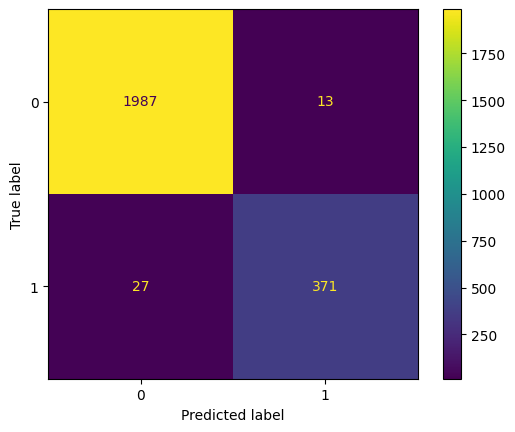

In [121]:
# EXTRA
cm = confusion_matrix(y_val, rf_cv_drop_2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv_drop_2.best_estimator_.classes_)
disp.plot()
plt.show()

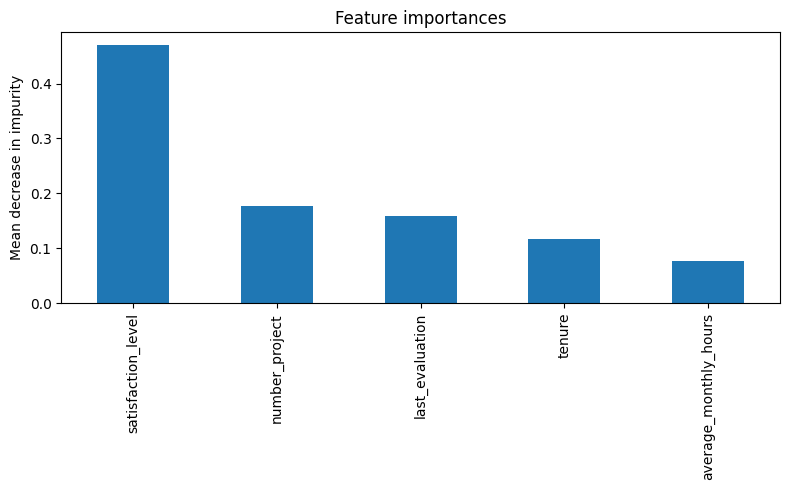

In [122]:
# EXTRA
importances = rf_cv_drop_2.best_estimator_.feature_importances_
rf_cv_drop_2_importances = pd.Series(importances, index=X_val_drop_2.columns)
rf_cv_drop_2_importances = rf_cv_drop_2_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_cv_drop_2_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

# Random Forest CV with least important features dropped and more searches

In [123]:
# EXTRA
rf_model = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [6,7,8,None],
             'max_features': [0.9,1.0],
             'max_samples': [0.7,0.8,0.9],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [150,200,250],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_cv_drop_2b = GridSearchCV(rf_model, cv_params, scoring=scoring, cv=5, refit='recall', verbose=2)

In [124]:
%%time
# EXTRA
#rf_cv_drop_2b.fit(X_train_drop_2, y_train)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.3 µs


In [125]:
# EXTRA
#write_pickle(path, rf_cv_drop_2b, 'rf_cv_drop_2b')

In [126]:
# EXTRA
rf_cv_drop_2b = read_pickle(path, 'rf_cv_drop_2b')

In [127]:
# EXTRA
rf_cv_drop_2b.best_params_

{'max_depth': 6,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [128]:
# EXTRA
rf_cv_drop_2b_pred = rf_cv_drop_2b.best_estimator_.predict(X_val_drop_2)
rf_cv_drop_2b_results = get_test_scores('Random Forest CV Drop 2b', rf_cv_drop_2b_pred, y_val)
results = pd.concat([results, rf_cv_drop_2b_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279
0,Logistic Regression Drop,0.577640,0.233668,0.332737,0.844454
0,Logistic Regression Drop Scaled,0.575000,0.231156,0.329749,0.844037
0,Decision Tree,0.916049,0.932161,0.924035,0.974562
0,Decision Tree CV,0.828508,0.934673,0.878394,0.957048
0,Random Forest CV,0.966146,0.932161,0.948849,0.983319
0,Random Forest CV Drop 2,0.966146,0.932161,0.948849,0.983319
0,Random Forest CV Drop 2b,0.966146,0.932161,0.948849,0.983319


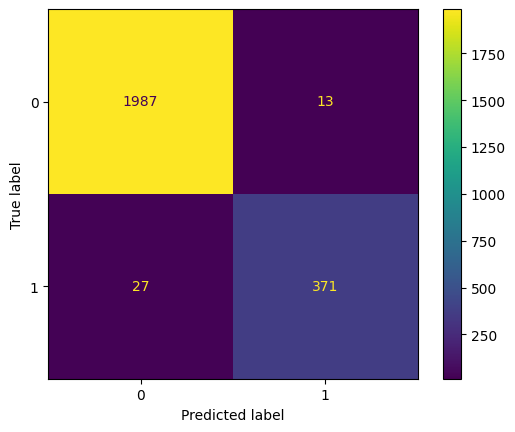

In [129]:
# EXTRA
cm = confusion_matrix(y_val, rf_cv_drop_2b_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv_drop_2b.best_estimator_.classes_)
disp.plot()
plt.show()

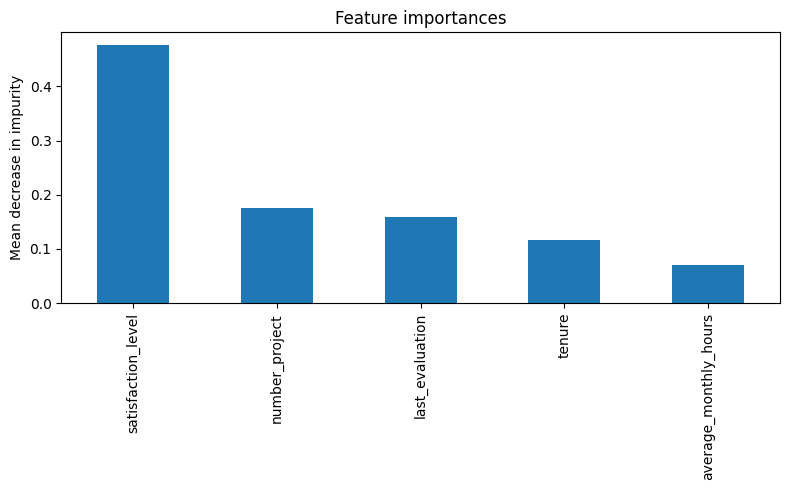

In [130]:
# EXTRA
importances = rf_cv_drop_2b.best_estimator_.feature_importances_
rf_cv_drop_2b_importances = pd.Series(importances, index=X_val_drop_2.columns)
rf_cv_drop_2b_importances = rf_cv_drop_2b_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_cv_drop_2b_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

# XGBoost

In [131]:
# EXTRA
#xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {'max_depth': [4, 5, 6, 7],
             'min_child_weight': [4, 5, 6],
             'learning_rate': [0.01, 0.1, 0.15],
             'n_estimators': [200, 300, 400]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

#xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall', verbose=1)

In [132]:
%%time
# EXTRA
#xgb_cv.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


In [133]:
# EXTRA write pickle
#write_pickle(path, xgb_cv, 'xgb_cv')

In [134]:
# EXTRA read pickle
xgb_cv = read_pickle(path, 'xgb_cv')

In [135]:
# EXTRA
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 4,
 'n_estimators': 200}

In [136]:
# EXTRA
xgb_cv_pred = xgb_cv.best_estimator_.predict(X_val)
xgb_cv_results = get_test_scores('XGBoost CV', xgb_cv_pred, y_val)
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279
0,Logistic Regression Drop,0.577640,0.233668,0.332737,0.844454
0,Logistic Regression Drop Scaled,0.575000,0.231156,0.329749,0.844037
0,Decision Tree,0.916049,0.932161,0.924035,0.974562
0,Decision Tree CV,0.828508,0.934673,0.878394,0.957048
0,Random Forest CV,0.966146,0.932161,0.948849,0.983319
0,Random Forest CV Drop 2,0.966146,0.932161,0.948849,0.983319
0,Random Forest CV Drop 2b,0.966146,0.932161,0.948849,0.983319
0,XGBoost CV,0.968170,0.917085,0.941935,0.981234


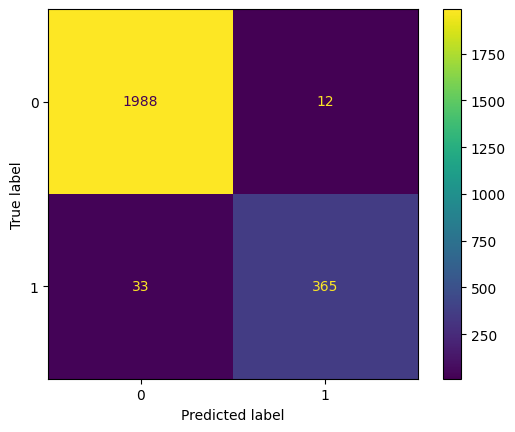

In [137]:
# EXTRA
cm = confusion_matrix(y_val, xgb_cv_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.best_estimator_.classes_)
disp.plot()
plt.show()

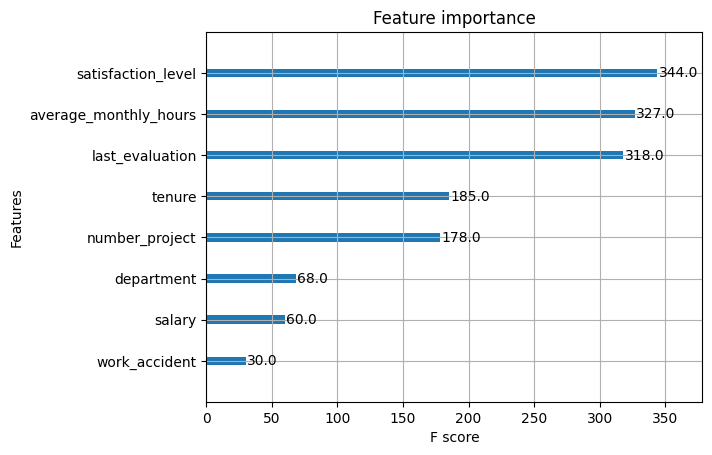

In [138]:
# EXTRA
plot_importance(xgb_cv.best_estimator_);

In [139]:
# EXTRA
f_score_xgb = xgb_cv.best_estimator_.get_booster().get_score(importance_type='weight')
f_score_xgb

{'satisfaction_level': 344.0,
 'last_evaluation': 318.0,
 'number_project': 178.0,
 'average_monthly_hours': 327.0,
 'tenure': 185.0,
 'work_accident': 30.0,
 'department': 68.0,
 'salary': 60.0}

In [140]:
# EXTRA
type(f_score_xgb)

dict

In [141]:
# EXTRA
sum(f_score_xgb.values())

1510.0

In [142]:
# EXTRA
344.0 / 1510.0

0.22781456953642384

In [143]:
# prompt: Using the dictionary f_score_xgb, create a new dictionary f_score_xgb_norm that has the same keys but normalized values.

f_score_xgb_norm = {k: v / sum(f_score_xgb.values()) for k, v in f_score_xgb.items()}
f_score_xgb_norm


{'satisfaction_level': 0.22781456953642384,
 'last_evaluation': 0.21059602649006623,
 'number_project': 0.11788079470198676,
 'average_monthly_hours': 0.2165562913907285,
 'tenure': 0.12251655629139073,
 'work_accident': 0.019867549668874173,
 'department': 0.045033112582781455,
 'salary': 0.039735099337748346}

In [144]:
# prompt: Sort the dictionary f_score_xgb_norm based on its values, in descending order.

sorted_f_score_xgb_norm = dict(sorted(f_score_xgb_norm.items(), key=lambda item: item[1], reverse=True))
sorted_f_score_xgb_norm


{'satisfaction_level': 0.22781456953642384,
 'average_monthly_hours': 0.2165562913907285,
 'last_evaluation': 0.21059602649006623,
 'tenure': 0.12251655629139073,
 'number_project': 0.11788079470198676,
 'department': 0.045033112582781455,
 'salary': 0.039735099337748346,
 'work_accident': 0.019867549668874173}

# The model chosen as the champion is Random Forest CV Drop 2b because it has the highest recall, F1, and accuracy scores, the 2nd highest precision score, and a reduced feature set.

# Champion Model B - Random Forest with X_tr and y_tr

In [145]:
# EXTRA
X_tr_drop_2 = X_tr.drop(columns=['department', 'salary', 'work_accident', 'promotion_last_5years'])
X_tr_drop_2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure
2041,0.98,0.91,4,240,3
10444,0.63,0.89,3,239,3
2030,0.85,0.59,3,235,3
11606,0.56,0.39,3,106,8
2008,0.50,0.75,6,127,3


In [146]:
# EXTRA
rf_tr_b_model = RandomForestClassifier(max_depth=6,
                                       max_features=1.0,
                                       max_samples=0.8,
                                       min_samples_leaf=1,
                                       min_samples_split=2,
                                       n_estimators=200,
                                       random_state=42)

In [147]:
# EXTRA
rf_tr_b_model.fit(X_tr_drop_2, y_tr)

RandomForestClassifier(max_depth=6, max_features=1.0, max_samples=0.8,
                       n_estimators=200, random_state=42)

In [148]:
# EXTRA
X_test_drop_2 = X_test.drop(columns=['department', 'salary', 'work_accident', 'promotion_last_5years'])
X_test_drop_2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure
11555,0.98,0.44,4,154,6
27,0.40,0.49,2,135,3
5890,0.30,0.67,3,232,3
9098,0.96,0.52,4,228,3
239,0.10,0.97,7,254,4


In [149]:
# EXTRA
rf_tr_b_pred = rf_tr_b_model.predict(X_test_drop_2)
rf_tr_b_results = get_test_scores('RF CV with Tr B', rf_tr_b_pred, y_test)
results = pd.concat([results, rf_tr_b_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.510204,0.188442,0.275229,0.835279
0,Logistic Regression Drop,0.577640,0.233668,0.332737,0.844454
0,Logistic Regression Drop Scaled,0.575000,0.231156,0.329749,0.844037
0,Decision Tree,0.916049,0.932161,0.924035,0.974562
0,Decision Tree CV,0.828508,0.934673,0.878394,0.957048
0,Random Forest CV,0.966146,0.932161,0.948849,0.983319
0,Random Forest CV Drop 2,0.966146,0.932161,0.948849,0.983319
0,Random Forest CV Drop 2b,0.966146,0.932161,0.948849,0.983319
0,XGBoost CV,0.968170,0.917085,0.941935,0.981234
0,RF CV with Tr B,0.973615,0.927136,0.949807,0.983743


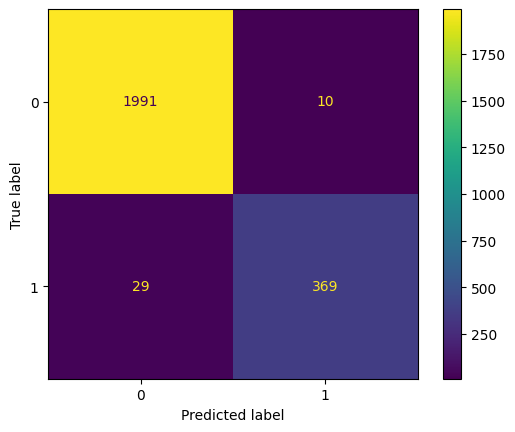

In [150]:
# EXTRA
cm = confusion_matrix(y_test, rf_tr_b_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_tr_b_model.classes_)
disp.plot()
plt.show()

In [151]:
# EXTRA
369 / (29 + 369)

0.9271356783919598

In [152]:
# EXTRA
1991 / (1991 + 10)

0.9950024987506247

In the test dataset,
* The model predicted about three times as many false negatives than it did false positives.
* The model correctly identified 92.7% of the employees who actually left the company, in other words, the model's type II error rate is 7.3%.
* The model correctly identified 99.5% of the employees who actually stayed with the company, in other words, the model's type I error rate is 0.5%.

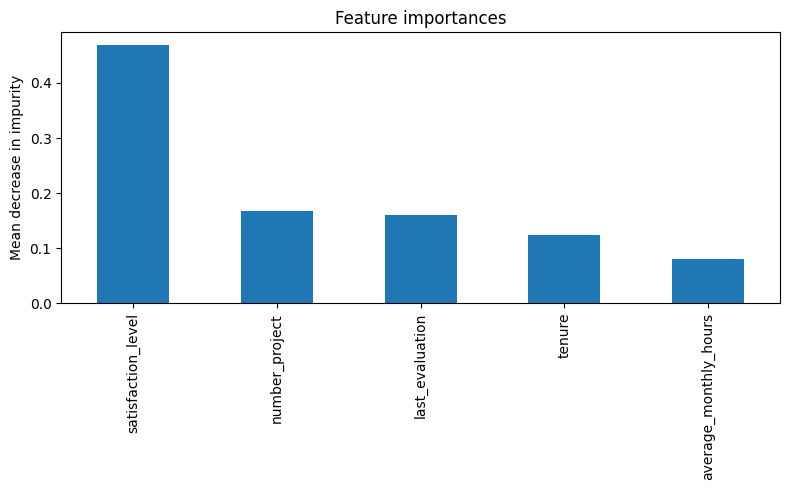

In [153]:
# EXTRA
importances = rf_tr_b_model.feature_importances_
rf_tr_b_importances = pd.Series(importances, index=X_tr_drop_2.columns)
rf_tr_b_importances = rf_tr_b_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_tr_b_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



* Do you notice anything odd?
  * The order of feature importances all have satisfaction_level as the most important, but the order for the other features were different.
    * For example, in the logistic regression model the features are ordered by magnitude of their coefficients: satisfaction_level, work_accident, promotion_last_5years, last_evaluation, salary, tenure, number_project, department, and average_monthly_hours.
    * In the decision tree model, the feature importance order can be inferred from its tree diagram: satisfaction_level, tenure, number_project, last_evaluation, and so on.
    * In the decision tree CV model, the feature importance order can be inferred from its tree diagram: satisfaction_level, tenure, number_project, average_monthly_hours, last_evaluation, and so on.
    * In the random forest model, the feature importance order is satisfaction_level, number_project, last_evaluation, tenure, average_monthly_hours, department, salary, work_accident, and promotion_last_5years.
    * In the XGBoost model, the feature importance order is satisfaction_level, average_monthly_hours, last_evaluation, tenure, number_project, department, salary, and work_accident.

* Which independent variables did you choose for the model and why?
  * satisfaction_level, last_evaluation, number_project, average_monthly_hours, tenure, work_accident, promotion_last_5years, department, salary

* Are each of the assumptions met?
  * Refer to the earlier notebook section “Logistic Regression model assumptions”.

* How well does your model fit the data?
  * From comparing the validation metric values between the different model types, the random forest model was chosen as the champion model.
  * The random forest model, tuned with the best hyperparameters, was fitted with X_tr and y_tr.
  * The resulting metrics are as follows: precision = 0.986631, recall = 0.927136, F1 = 0.955959, accuracy = 0.985827

* Can you improve it? Is there anything you would change about the model?
  * Test the tree-based models with more hyperparameter tuning values if possible for better model optimization.

* What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
  * The results of a survey conducted by Human Resources on a sample of employees for their “satisfaction_level”, “last_evaluation” score, and so on.
  * Jupyter Notebook on Google Colaboratory

* Do you have any ethical considerations in this stage?

  Below is a list of considerations in regard to ethics, which we need to check at various stages of the PACE process.
  * Aggregate data and remove personally identifiable information to protect people and give them more control over their own data.
  * Will removing outliers to improve results, predictions, or forecasts change the data story?
  * Correlation is not causation.
  * Logistic regression, its logit being modeled in the form of multiple linear regression, can yield highly interpretable and communicable results. But because the underlying math could a bit more complex, be mindful of how results are conveyed and what the coefficients mean.
  * Prioritize fairness in the data that we have and will be used. Part of this responsible data stewardship is taking steps to reduce the potential of unintended consequences of machine learning applications.
  * Recognizing the potential for bias will help to minimize risk. Bias in machine learning is particularly deceptive because it stems from human bias. But because a computer makes the prediction, it's easy for the result to seem objective. Often, the bias is unintentional.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

* Binary classification

### Identify the types of models most appropriate for this task.

* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

### Modeling

Add as many cells as you need to conduct the modeling process.

In [154]:
### YOUR CODE HERE ###


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [155]:
# prompt: Calculate the AUC of rf_tr_b_model.

#from sklearn.metrics import roc_auc_score

# Calculate AUC
auc_score = roc_auc_score(y_test, rf_tr_b_model.predict_proba(X_test_drop_2)[:, 1])
print(f"AUC of rf_tr_b_model: {auc_score}")


AUC of rf_tr_b_model: 0.9801920647716342


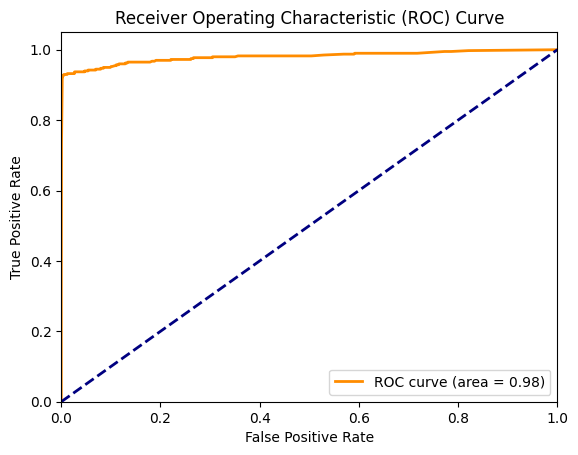

In [156]:
# prompt: Display ROC curve of rf_tr_b_model.

#from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_tr_b_model.predict_proba(X_test_drop_2)[:, 1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


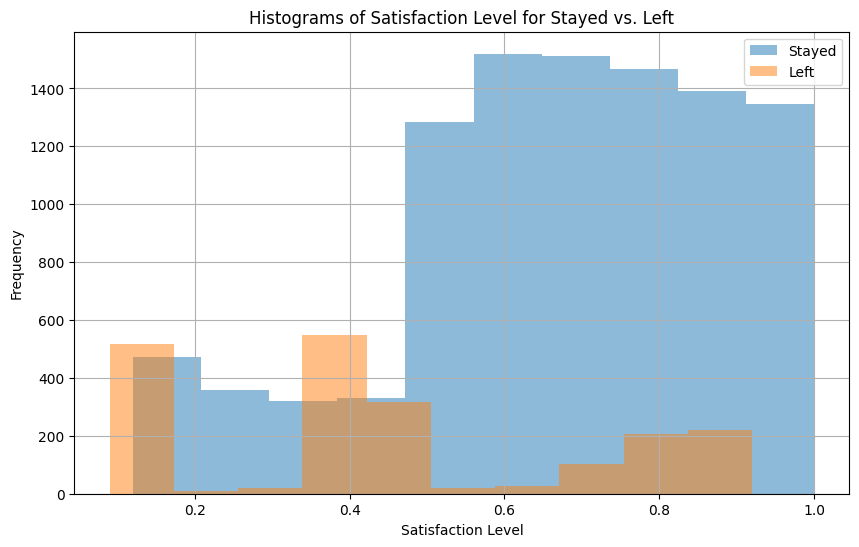

In [157]:
# prompt: show histograms of "satisfaction_level" for "left" = 0 and "left"= 1.

# Create histograms for "satisfaction_level" for "left" = 0 and "left" = 1
plt.figure(figsize=(10, 6))
df1[df1['left'] == 0]['satisfaction_level'].hist(alpha=0.5, label='Stayed')
df1[df1['left'] == 1]['satisfaction_level'].hist(alpha=0.5, label='Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Histograms of Satisfaction Level for Stayed vs. Left')
plt.legend()
plt.show()


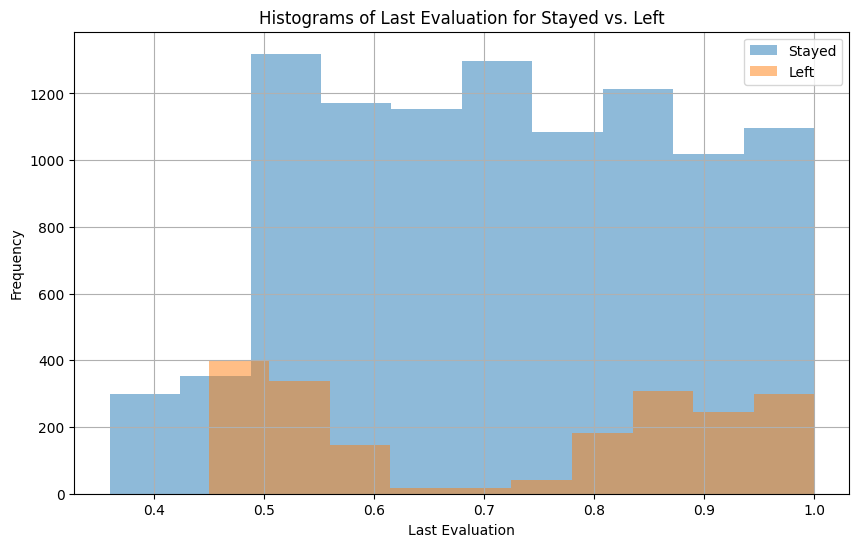

In [158]:
# prompt: show histograms of "last_evaluation" for "left" = 0 and "left"= 1.

# Create histograms for "last_evaluation" for "left" = 0 and "left" = 1
plt.figure(figsize=(10, 6))
df1[df1['left'] == 0]['last_evaluation'].hist(alpha=0.5, label='Stayed')
df1[df1['left'] == 1]['last_evaluation'].hist(alpha=0.5, label='Left')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.title('Histograms of Last Evaluation for Stayed vs. Left')
plt.legend()
plt.show()


💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



* What key insights emerged from your model(s)?
  * Between the logistic regression model and the three machine learning models, the random forest model performed the best on the data.
  * Logistic Regression metrics: precision = 0.510204, recall = 0.188442, F1 = 0.275229, accuracy = 0.835279
  * Decision Tree metrics: precision = 0.916049, recall = 0.932161, F1 = 0.924035, accuracy = 0.974562
  * Decision Tree CV metrics: precision = 0.828508, recall = 0.934673, F1 = 0.878394, accuracy = 0.957048
  * Random Forest CV metrics: precision = 0.966146, recall = 0.932161, F1 = 0.948849, accuracy = 0.983319
  * XGBoost CV metrics: precision = 0.968170, recall = 0.917085, F1 = 0.941935, accuracy = 0.981234
  * RF CV with Tr metrics: precision = 0.986631, recall = 0.927136, F1 = 0.955959, accuracy = 0.985827

* What business recommendations do you propose based on the models built?
  * Utilize the Random Forest model to predict if an employee will leave the company or not.
  * Conduct more cross-validation on the Random Forest model and the other tree-based models with more hyperparameter values for further optimization.

* What potential recommendations would you make to your manager/company?
  * To retain the employees, the company should focus on the following features, in the order of importance,
    * each employee's satisfaction level (satisfaction_level),
    * the number of projects each employee contributed to (number_project),
    * each employee's last performance review score (last_evaluation),
    * how many years each employee has been with the company (tenure), and
    * each employee's average number of work hours per month (average_monthly_hours).
  * To understand how these features would influence the target variable, left, we could, for example, look at the marginal distributions, see above, as an example, the histograms of satisfaction_level for left being true or false:
    * In general, one can see, if satisfaction_level is higher than about 0.5, then most of such employees stayed--the blue plot.
    * For the employees who left--the orange plot, there are three peaks at about both ends of the range of satisfaction_level, and at the middle around 0.4 of satisfaction_level.
    * Caution: be mindful about the shortcomings of not considering multivariate interactions in the above approach.

* Do you think your model could be improved? Why or why not? How?
  * Test the random forest model with more hyperparameter tuning values if possible for better model optimization.

* Given what you know about the data and the models you were using, what other questions could you address for the team?
  * What factors contribute to satisfaction_level?
  * What factors contribute to last_evaluation?

* What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
  * The results of a survey conducted by Human Resources on a sample of employees for their “satisfaction_level”, “last_evaluation” score, and so on.
  * Jupyter Notebook on Google Colaboratory

* Do you have any ethical considerations in this stage?

  Below is a list of considerations in regard to ethics, which we need to check at this stage.
  * Aggregate data and remove personally identifiable information to protect people and give them more control over their own data.
  * Will removing outliers to improve results, predictions, or forecasts change the data story?
  * Correlation is not causation.
  * Logistic regression, its logit being modeled in the form of multiple linear regression, can yield highly interpretable and communicable results. But because the underlying math could a bit more complex, be mindful of how results are conveyed and what the coefficients mean.
  * Prioritize fairness in the data that we have and will be used. Part of this responsible data stewardship is taking steps to reduce the potential of unintended consequences of machine learning applications.
  * Recognizing the potential for bias will help to minimize risk. Bias in machine learning is particularly deceptive because it stems from human bias. But because a computer makes the prediction, it's easy for the result to seem objective. Often, the bias is unintentional.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

* Four model architectures were used to create 9 models to predict whether an employee of Salifort Motors will leave the company or not. The model architectures are Logistic Regression, Decision Tree, Random Forest, and XGBoost. The evaluation metric results for models are as follows:
* Logistic Regression Architecture
  * Logistic Regression: Precision = 0.510204, Recall = 0.188442, F1 = 0.275229, Accuracy = 0.835279
  * Logistic Regression Drop: Precision = 0.577640, Recall = 0.233668, F1 = 0.332737, Accuracy = 0.844454
  * Logistic Regression Drop Scaled: Precision = 0.575000, Recall = 0.231156, F1 = 0.329749, Accuracy = 0.844037
* Decision Tree Architecture
  * Decision Tree: Precision = 0.916049, Recall = 0.932161, F1 = 0.924035, Accuracy = 0.974562
  * Decision Tree CV (the same Decision Tree model with cross-validation): Precision = 0.828508, Recall = 0.934673, F1 = 0.878394, Accuracy = 0.957048
* Random Forest Architecture
  * Random Forest CV: Precision = 0.966146, Recall = 0.932161, F1 = 0.948849, Accuracy = 0.983319
  * Random Forest CV Drop 2: Precision = 0.966146, Recall = 0.932161, F1 = 0.948849, Accuracy = 0.983319
  * Random Forest CV Drop 2b: Precision = 0.966146, Recall = 0.932161, F1 = 0.948849, Accuracy = 0.983319
* XGBoost Architecture
  * XGBoost CV: Precision = 0.968170, Recall = 0.917085, F1 = 0.941935, Accuracy = 0.981234
* RF CV with Tr B (the Random Forest model tuned with the best hyperparameters for 2b and fitted with the training and validation sets combined.)
  * Precision = 0.973615, Recall = 0.927136, F1 = 0.949807, Accuracy = 0.983743

### Conclusion, Recommendations, Next Steps

* From comparing the models' evaluation metric results, the random forest model performed the best on the data.
* We recommend that Salifort Motors to begin utilizing the Random Forest model to predict if an employee will leave the company or not.
* If possible, further cross-validation on the Random Forest model and the other tree-based models (Decision Tree and XGBoost) with more hyperparameter combinations can be conducted for further optimization.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

# K-Means

In [159]:
# EXTRA Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [160]:
# EXTRA
df2 = df1.copy()
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [161]:
# EXTRA
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  int64  
 9   salary                 11991 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.0 MB


In [162]:
# EXTRA
X_2 = df2.drop(columns=['left'], axis=1)
X_2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0
4,0.37,0.52,2,159,3,0,0,0,0


In [164]:
# EXTRA
X_2_scaled = StandardScaler().fit_transform(X_2)
X_2_scaled[:2,:]

array([[-1.03566801, -1.10899046, -1.54992118, -0.89220779, -0.2742906 ,
        -0.42711564, -0.13122844, -0.98444874, -0.94966952],
       [ 0.70663718,  0.85137984,  1.02919412,  1.26270891,  1.9810364 ,
        -0.42711564, -0.13122844, -0.98444874,  0.62297062]])

In [165]:
# EXTRA, Fit K-means and evaluate inertia for different values of k.
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns:
        inertia:      (list)          - A list of inertia scores, one for each \
                                      value of k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [166]:
# EXTRA, Return a list of inertia for k=2 to 10.
inertia = kmeans_inertia(num_clusters, X_2_scaled)
inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[95141.64694515345,
 83187.81325339175,
 72841.18388430201,
 65381.32457203383,
 60194.74677981628,
 56040.87952512328,
 52463.87902550263,
 50597.248096206335,
 49135.36320152294]

Text(0, 0.5, 'Inertia')

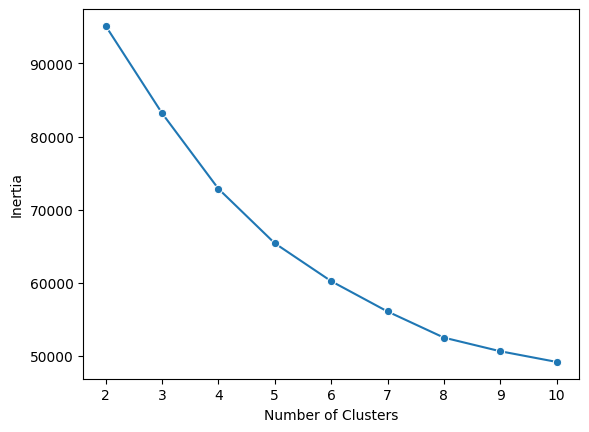

In [167]:
# EXTRA, Create a line plot.
plot = sns.lineplot(x=num_clusters, y=inertia, marker='o')
plot.set_xlabel('Number of Clusters')
plot.set_ylabel('Inertia')

In [168]:
# EXTRA, Evaluate silhouette score.
# Write a function to return a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns:
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''

    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

In [169]:
# EXTRA: Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, X_2_scaled)
sil_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[0.1703550709033578,
 0.17176563618223523,
 0.2017321677220619,
 0.16623528393488718,
 0.1667063380998121,
 0.17654095859851843,
 0.17465065452487355,
 0.17175833275589536,
 0.15529476737655623]

Text(0, 0.5, 'Silhouette Score')

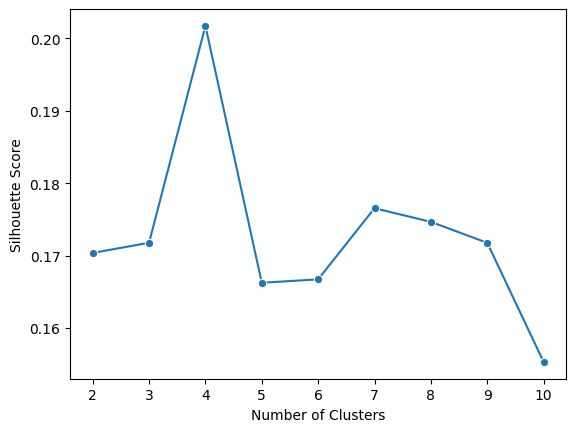

In [170]:
# EXTRA, Create a line plot.
plot = sns.lineplot(x=num_clusters, y=sil_score, marker='o')
plot.set_xlabel('Number of Clusters')
plot.set_ylabel('Silhouette Score')

In [171]:
# EXTRA, Fit a 4-cluster model.
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(X_2_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [172]:
# EXTRA, Print unique labels.
print(kmeans4.labels_)
print('Unique labels:', np.unique(kmeans4.labels_))

[1 3 3 ... 0 0 1]
Unique labels: [0 1 2 3]


In [173]:
# EXTRA, Create a new column `cluster`.
df2['cluster'] = kmeans4.labels_
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,1,3
2,0.11,0.88,7,272,4,0,1,0,0,1,3
3,0.72,0.87,5,223,5,0,1,0,0,0,3
4,0.37,0.52,2,159,3,0,1,0,0,0,1


In [174]:
# EXTRA
df2.groupby(['left'])['cluster'].value_counts()

left  cluster
0     1          6384
      3          1750
      2          1671
      0           195
1     3          1032
      1           870
      2            81
      0             8
Name: count, dtype: int64

In [175]:
# EXTRA
df2.groupby(['cluster'])['left'].value_counts()

cluster  left
0        0        195
         1          8
1        0       6384
         1        870
2        0       1671
         1         81
3        0       1750
         1       1032
Name: count, dtype: int64

In [176]:
# EXTRA
df2.groupby(by=['cluster', 'left']).size()

cluster  left
0        0        195
         1          8
1        0       6384
         1        870
2        0       1671
         1         81
3        0       1750
         1       1032
dtype: int64

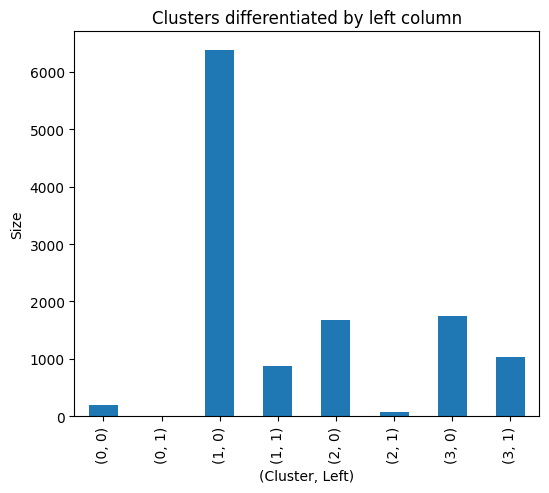

In [177]:
# EXTRA
df2.groupby(by=['cluster', 'left']).size().plot.bar(title='Clusters differentiated by left column',
                                                    figsize=(6, 5),
                                                    ylabel='Size',
                                                    xlabel='(Cluster, Left)');

# K-Means with Smaller Feature Set

In [178]:
# EXTRA
df3 = df1.copy()
df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [179]:
# EXTRA
X_3 = df3.drop(columns=['left', 'department', 'salary', 'work_accident', 'promotion_last_5years'], axis=1)
X_3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [180]:
# EXTRA
X_3_scaled = StandardScaler().fit_transform(X_3)
X_3_scaled[:2,:]

array([[-1.03566801, -1.10899046, -1.54992118, -0.89220779, -0.2742906 ],
       [ 0.70663718,  0.85137984,  1.02919412,  1.26270891,  1.9810364 ]])

In [181]:
# EXTRA, Return a list of inertia for k=2 to 10.
inertia = kmeans_inertia(num_clusters, X_3_scaled)
inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[47212.10410727045,
 38551.264980275606,
 33677.207117113365,
 29444.511966681705,
 26754.768755402532,
 24711.18190622864,
 23052.482508958787,
 21514.930849030578,
 20517.68088077916]

Text(0, 0.5, 'Inertia')

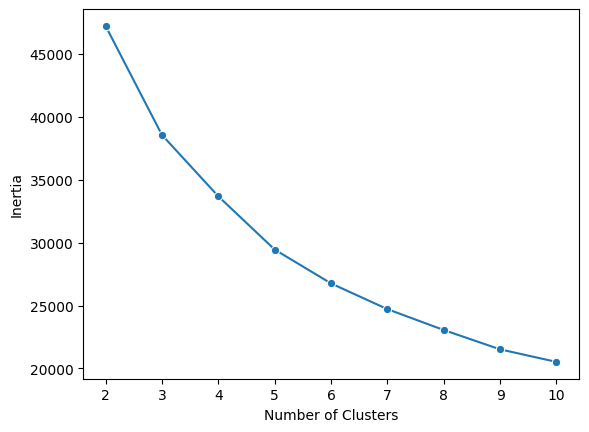

In [182]:
# EXTRA, Create a line plot.
plot = sns.lineplot(x=num_clusters, y=inertia, marker='o')
plot.set_xlabel('Number of Clusters')
plot.set_ylabel('Inertia')

In [183]:
# EXTRA: Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, X_3_scaled)
sil_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[0.26134128155603387,
 0.22029242537763027,
 0.24477233686226957,
 0.2297671280748018,
 0.22756096407282558,
 0.23175900559742457,
 0.23041914730096663,
 0.23457841237287497,
 0.23171906036657927]

Text(0, 0.5, 'Silhouette Score')

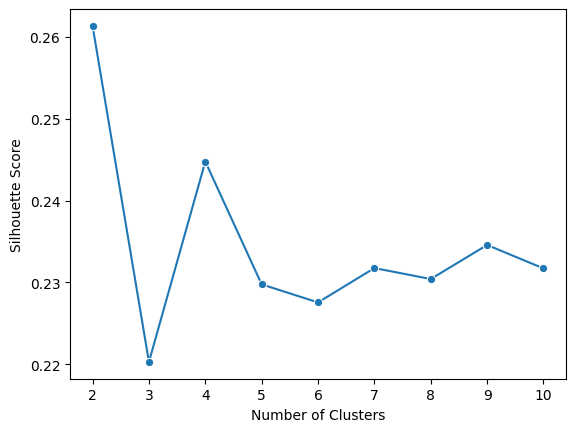

In [184]:
# EXTRA, Create a line plot.
plot = sns.lineplot(x=num_clusters, y=sil_score, marker='o')
plot.set_xlabel('Number of Clusters')
plot.set_ylabel('Silhouette Score')

In [185]:
# EXTRA, Fit a 2-cluster model.
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(X_3_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [186]:
# EXTRA, Print unique labels.
print(kmeans2.labels_)
print('Unique labels:', np.unique(kmeans2.labels_))

[1 0 0 ... 0 0 1]
Unique labels: [0 1]


In [187]:
# EXTRA, Create a new column `cluster`.
df3['cluster'] = kmeans2.labels_
df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,1


In [188]:
# EXTRA
df3.groupby(['left'])['cluster'].value_counts()

left  cluster
0     1          7854
      0          2146
1     0          1070
      1           921
Name: count, dtype: int64

In [189]:
# EXTRA
df3.groupby(['cluster'])['left'].value_counts()

cluster  left
0        0       2146
         1       1070
1        0       7854
         1        921
Name: count, dtype: int64

In [190]:
# EXTRA
df3.groupby(by=['cluster', 'left']).size()

cluster  left
0        0       2146
         1       1070
1        0       7854
         1        921
dtype: int64

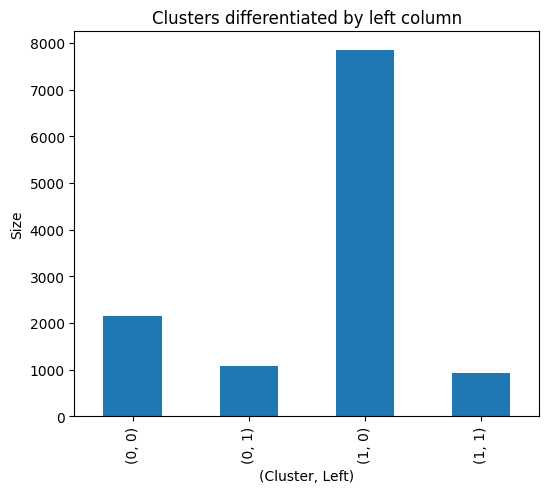

In [191]:
# EXTRA
df3.groupby(by=['cluster', 'left']).size().plot.bar(title='Clusters differentiated by left column',
                                                    figsize=(6, 5),
                                                    ylabel='Size',
                                                    xlabel='(Cluster, Left)');